# **1. Introduction**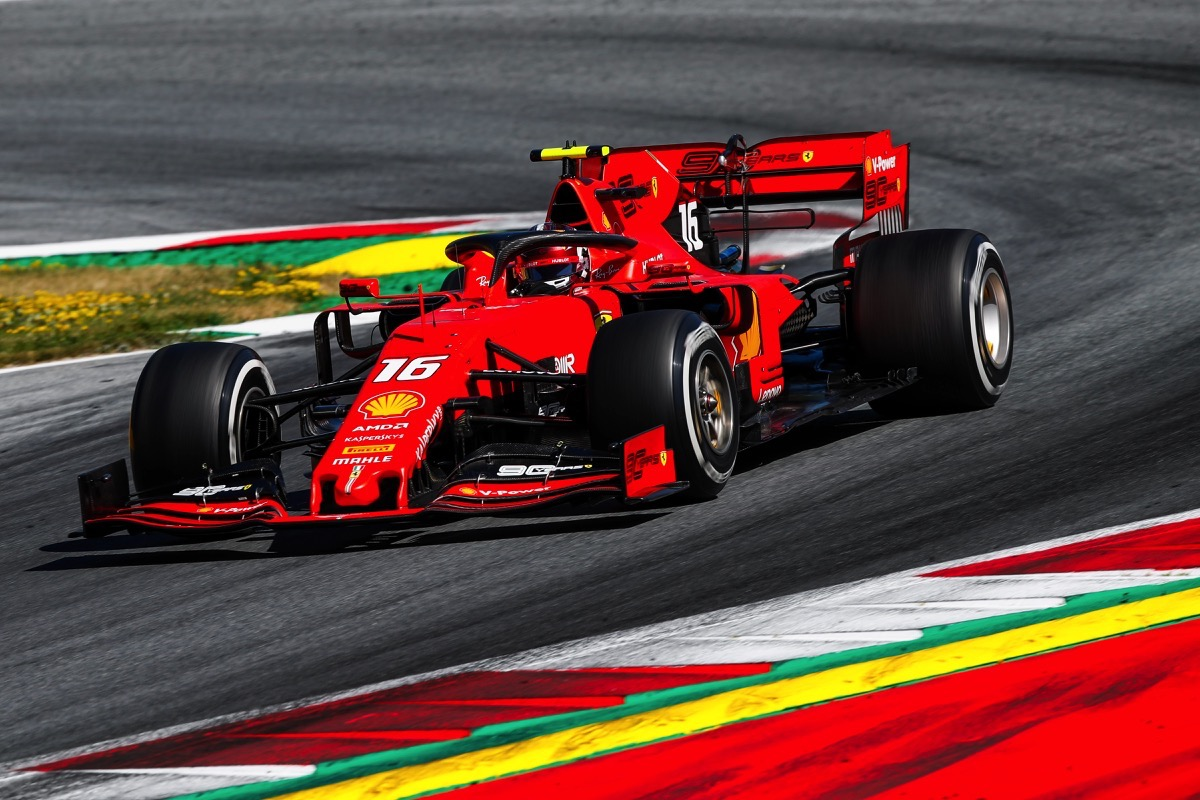

Le monde de la Formule 1 vient de connaître un nouveau un champion du monde, Max Verstappen, 24 ans et pilote chez RedBull. A l’opposé du classement, Charles Leclerc, 24 ans, pilote pour la Scuderia Ferrari vient de terminer le championnat de formule 1 2021, 7ème au classement général avec un seul podium et aucune victoire. Les résultats, très divergents entre les deux pilotes interrogent et suscitent l'intérêt du pilote et de l'écurie.

Comment expliquer un tel contraste entre ces deux pilotes du même âge ? Est-ce l’écurie ? La nationalité ? L’expérience ? les qualifications? Ou encore la place sur la grille?

 En tant que Data analystes, nous avons décidé de nous pencher sur l’écurie Scuderia Ferrari et plus précisément sur le cas de Charles Leclerc dont l’avenir est pourtant très prometteur.

Notre objectif est dans un premier temps de comprendre les facteurs influençant positivement et négativement la carrière de ce pilote monégasque en les comparant avec les écuries et pilotes concurrents. Dans un second temps, sur base des observations et des conclusions déduites préalablement, nous serons en mesure de pouvoir conseiller Charles Leclerc et son écurie afin de les mener vers un futur trophée.


Ce projet de Data Analytics concernant le dataset **"Formula 1 Races"** est le fruit d'un travail collaboratif entre **Sacha Hermant** et **Noé Ruidant**. L'ensemble du projet ayant été réalisé en binôme, nous n'avons pas jugé nécessaire de mentionner nos noms et prénoms au-dessus de chaque cellule de code.

# **2. Packages and data required**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statistics

#SKlearn imports
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
#Sklearn - regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Sklearn - Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot

In [ ]:
#https://newbedev.com/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

**Cette fonction sert à afficher les résultats côte à côte afin d'avoir une meilleure visibilité.**

In [ ]:
circuits = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/circuits.csv')
constructor_results = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/constructor_results.csv')
constructor_standings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/constructor_standings.csv')
constructors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/constructors.csv')
driver_standings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/driver_standings.csv')
drivers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/drivers.csv')
lap_times = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/lap_times.csv')
pit_stops = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/pit_stops.csv')
qualifying = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/qualifying.csv')
races = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/races.csv')
results = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/results.csv')
seasons = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/seasons.csv')
status = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/status.csv')

# **3. Data Cleaning and Preparation**


##**3.0. Fusion de tables (début)**

Ces tables nous permettront tout au long de la partie Data Cleaning et EDA de gagner du temps et d'obtenir des informations complémentaires sur les courses. Elles sont primordiales pour répondre à nos futures questionnements.

In [ ]:
res_dri = pd.merge(results,drivers,how='inner',on='driverId')
res_dri_con = pd.merge(res_dri,constructors,how='inner',on='constructorId')
res_dri_con_rac = pd.merge(res_dri_con,races,how='inner',on='raceId')

##**3.1. Circuits**

In [ ]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


**Exploration:**

Pour toutes la table, on regarde la shape et la somme des valeurs null. Ensuite, pour chaque colonne de cette table, on regarde le nom, le type et l'ensemble des valeurs possibles

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", circuits.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      circuits.isnull().sum())
for column in circuits.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', circuits[column].dtypes,'\n',
          'Unique values:','\n',
          circuits[column].unique())

Shape of the table: (77, 9)
# of null values: 
 circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64
Name: circuitId 
 Type: int64 
 Unique values: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77]
Name: circuitRef 
 Type: object 
 Unique values: 
 ['albert_park' 'sepang' 'bahrain' 'catalunya' 'istanbul' 'monaco'
 'villeneuve' 'magny_cours' 'silverstone' 'hockenheimring' 'hungaroring'
 'valencia' 'spa' 'monza' 'marina_bay' 'fuji' 'shanghai' 'interlagos'
 'indianapolis' 'nurburgring' 'imola' 'suzuka' 'osterreichring'
 'yas_marina' 'galvez' 'jerez' 'estoril' 'okayama' 'adelaide' 'kyalami'
 'donington' 'rodriguez' 'phoenix' 'ricard' 'yeongam' 'jacarepagua'
 'detroit' 'brands_hatch' 'zandvoort' 'zolder'

**Nous supprimons les colonnes qui n'apportent pas d'informations supplémentaires à la résolution de notre question de recherche.**

In [ ]:
del(circuits['lat'])
del(circuits['lng'])
del(circuits['alt'])
del(circuits['url'])

##**3.2. constructor_results**

In [ ]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", constructor_results.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      constructor_results.isnull().sum())
for column in constructor_results.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', constructor_results[column].dtypes,'\n',
          'Unique values:','\n',
          constructor_results[column].unique())

Shape of the table: (11860, 5)
# of null values: 
 constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64
Name: constructorResultsId 
 Type: int64 
 Unique values: 
 [    1     2     3 ... 16357 16358 16359]
Name: raceId 
 Type: int64 
 Unique values: 
 [  18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87
   88   89   90   91   92   93   94   95   96   97   98   99  100  101
  102  103  104  105  106  107  108  109  110  111  112  113  114  115
  116  117  118  119  120  121  122  123  124  125  126  127  128  129
  130  131  132  133  134  135  136  137  138  139  140  141  142  143
  144  145  146  14

Quelle est la proportion de valeurs manquantes ('\\N') que contient la colonne "status"?

In [ ]:
constructor_results["status"].value_counts()

\N    11843
D        17
Name: status, dtype: int64

**La valeur 'D' signifie la disqualification d'un certain constructeur pour une certaine course. De plus, la valeur par défaut de cette colonne est 'null'. Nous faisons donc l'hypothèse que 'null' signifie la non discalification d'un constructeur à une course**

In [ ]:
constructor_results.loc[constructor_results['status']!='D', 'status'] = 'OK'

##**3.3. constructor_standings**

In [ ]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", constructor_standings.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      constructor_standings.isnull().sum())
for column in constructor_standings.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', constructor_standings[column].dtypes,'\n',
          'Unique values:','\n',
          constructor_standings[column].unique())

Shape of the table: (12626, 7)
# of null values: 
 constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64
Name: constructorStandingsId 
 Type: int64 
 Unique values: 
 [    1     2     3 ... 27840 27841 27842]
Name: raceId 
 Type: int64 
 Unique values: 
 [  18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   71   72   73
   74   75   76   77   78   79   80   81   82   83   84   85   86   87
   88   89   90   91   92   93   94   95   96   97   98   99  100  101
  102  103  104  105  106  107  108  109  110  111  112  113  114  115
  116  117  118  119  120  121  122  123  124  125  126  127  128  129
  130  131  132  133  

Quelle différence entre les valeurs de "positionText" et de "position"?

In [ ]:
constructor_standings["positionText"].value_counts()

1     984
3     984
2     984
4     983
6     983
5     983
7     979
8     967
9     953
10    917
11    706
12    497
13    389
14    333
15    300
16    227
17    179
18    124
19     94
20     29
E      17
-      10
21      3
22      1
Name: positionText, dtype: int64

In [ ]:
constructor_standings["position"].value_counts()

1     985
2     985
3     985
6     984
5     984
4     984
7     980
8     968
9     954
10    918
11    723
12    497
13    389
14    333
15    300
16    227
17    179
18    124
19     94
20     29
21      3
22      1
Name: position, dtype: int64

In [ ]:
constructor_standings[constructor_standings['positionText']=='E']

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
217,25756,38,1,44.0,11,E,1
227,25767,39,1,58.0,11,E,1
236,25778,40,1,76.0,11,E,2
245,25789,41,1,88.0,11,E,3
254,25800,42,1,106.0,11,E,4
263,25811,43,1,114.0,11,E,4
272,25822,44,1,128.0,11,E,5
281,25833,45,1,138.0,11,E,5
290,25844,46,1,138.0,11,E,6
299,25855,47,1,148.0,11,E,6


**On remarque rapidement que certaines valeurs entre positionText et position diffèrent. De plus, la colonne "positionText" nous donne des informations supplémentaires sur l'exclusion ou la disqualification de constructeurs.
Néanmoins, il nous parait judicieux de garder ces deux colonnes car "position" nous permet de travailler exclusivement avec des int, ce qui nous sera utile par la suite.**

**Enfin, nous devons rester vigilent car quand on regarde la "position" des écuries dont la "positionText" est égale à 'E', on remarque qu'elle est égale à 11, ce qui n'est pas tout à fait correct et rend l'interpretation des positions ambigues. Cela vient du fait que depuis 1980, seulement 10 écuries par saison sont invitées à conquourir, la 11ème est donc reservée aux disqualifiés.**

Mais que signifie la valeur "-" pour la colonne "positionText"?

In [ ]:
constructor_standings[constructor_standings["positionText"] == '-']

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
12486,27663,1051,51,0.0,1,-,0
12487,27664,1051,214,0.0,2,-,0
12488,27665,1051,117,0.0,3,-,0
12489,27666,1051,6,0.0,4,-,0
12490,27667,1051,210,0.0,5,-,0
12491,27668,1051,1,0.0,6,-,0
12492,27669,1051,131,0.0,7,-,0
12493,27670,1051,9,0.0,8,-,0
12494,27671,1051,213,0.0,9,-,0
12495,27672,1051,3,0.0,10,-,0


In [ ]:
constr_stand_merged = pd.merge(constructor_standings,races,how='inner',on='raceId')
constr_stand_merged = pd.merge(constr_stand_merged,constructors,how='inner',on='constructorId')
constr_stand_merged[constr_stand_merged["positionText"] == '-']

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,circuitId,name_x,date,time,url_x,constructorRef,name_y,nationality,url_y
839,27668,1051,1,0.0,6,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1690,27672,1051,3,0.0,10,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3346,27666,1051,6,0.0,4,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
3801,27670,1051,9,0.0,8,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9061,27663,1051,51,0.0,1,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
11740,27665,1051,117,0.0,3,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
12051,27669,1051,131,0.0,7,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
12490,27667,1051,210,0.0,5,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
12598,27671,1051,213,0.0,9,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
12612,27664,1051,214,0.0,2,-,0,2021,21,1,Australian Grand Prix,2021-11-21,06:00:00,http://en.wikipedia.org/wiki/2021_Australian_G...,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


**On se rend rapidement compte que ces valeurs ("-") correspondent au Grand Prix d’Australie 2021 qui a été annulé à cause du COVID-19. Nous décidons donc de supprimer ces lignes qui n'apportent aucune information.**

In [ ]:
#source: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
constructor_standings = constructor_standings.drop(constructor_standings[constructor_standings.positionText == '-'].index)

##**3.4. constructors**

In [ ]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", constructors.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      constructors.isnull().sum())
for column in constructors.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', constructors[column].dtypes,'\n',
          'Unique values:','\n',
          constructors[column].unique())

Shape of the table: (211, 5)
# of null values: 
 constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
Name: constructorId 
 Type: int64 
 Unique values: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 167 166 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 19

**Nous supprimons la colonne "url" qui n'apportent pas d'informations supplémentaires à la résolution de notre question de recherche.**

In [ ]:
del(constructors['url'])

##**3.5. driver_standings**

In [ ]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", driver_standings.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      driver_standings.isnull().sum())
for column in driver_standings.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', driver_standings[column].dtypes,'\n',
          'Unique values:','\n',
          driver_standings[column].unique())

Shape of the table: (33206, 7)
# of null values: 
 driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64
Name: driverStandingsId 
 Type: int64 
 Unique values: 
 [    1     2     3 ... 70569 70570 70571]
Name: raceId 
 Type: int64 
 Unique values: 
 [  18   19   20 ... 1062 1063 1064]
Name: driverId 
 Type: int64 
 Unique values: 
 [  1   2   3   4   5   6   7   8   9  15  17  14  18  12  21  22  19  11
  13  10  16  20  24  23  26  25  27  29  33  32  31  30  35  34  36  37
  38  39  40  42  45  44  43  47  46  48  41  50  49  52  51  53  62  63
  56  66  59  55  54  58  60  57  61  64  65  68  70  69  71  76  75  73
  74  78  77  79  81  82  83  84  85  86  88  87  93  94  95  91  96  89
  90  92  97  98  99 101 100 103 102 104 106 105 107 108 110 109 111 118
 117 112 120 119 123 121 126 128 127 122 129 830 125 131 822 136 142 141
 140 133 139 143 144 152 150 149 11

**Pour les mêmes raisons que précédemment, nous supprimons les lignes dont la valeur de "positionText" est égale à '-'**

In [ ]:
driver_standings = driver_standings.drop(driver_standings[driver_standings.positionText == '-'].index)

##**3.6. drivers**

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", drivers.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      drivers.isnull().sum())
for column in drivers.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', drivers[column].dtypes,'\n',
          'Unique values:','\n',
          drivers[column].unique())

Shape of the table: (853, 9)
# of null values: 
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64
Name: driverId 
 Type: int64 
 Unique values: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 18

A quoi correspondent les valeurs manquantes de "number" et de "code"?

In [ ]:
drivers[drivers['number']=='\\N']


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock
...,...,...,...,...,...,...,...,...,...
811,812,chandhok,\N,CHA,Karun,Chandhok,1984-01-19,Indian,http://en.wikipedia.org/wiki/Karun_Chandhok
813,814,resta,\N,DIR,Paul,di Resta,1986-04-16,British,http://en.wikipedia.org/wiki/Paul_di_Resta
815,816,ambrosio,\N,DAM,Jérôme,d'Ambrosio,1985-12-27,Belgian,http://en.wikipedia.org/wiki/J%C3%A9r%C3%B4me_...
818,819,pic,\N,PIC,Charles,Pic,1990-02-15,French,http://en.wikipedia.org/wiki/Charles_Pic


In [ ]:
drivers[drivers['code']=='\\N']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
42,43,matta,\N,\N,Cristiano,da Matta,1973-09-19,Brazilian,http://en.wikipedia.org/wiki/Cristiano_da_Matta
43,44,panis,\N,\N,Olivier,Panis,1966-09-02,French,http://en.wikipedia.org/wiki/Olivier_Panis
44,45,pantano,\N,\N,Giorgio,Pantano,1979-02-04,Italian,http://en.wikipedia.org/wiki/Giorgio_Pantano
45,46,bruni,\N,\N,Gianmaria,Bruni,1981-05-30,Italian,http://en.wikipedia.org/wiki/Gianmaria_Bruni
46,47,baumgartner,\N,\N,Zsolt,Baumgartner,1981-01-01,Hungarian,http://en.wikipedia.org/wiki/Zsolt_Baumgartner
...,...,...,...,...,...,...,...,...,...
802,802,serafini,\N,\N,Dorino,Serafini,1909-07-22,Italian,http://en.wikipedia.org/wiki/Dorino_Serafini
803,803,cantrell,\N,\N,Bill,Cantrell,1908-01-31,American,http://en.wikipedia.org/wiki/William_Cantrell
804,804,mantz,\N,\N,Johnny,Mantz,1918-09-18,American,http://en.wikipedia.org/wiki/Johnny_Mantz
805,805,kladis,\N,\N,Danny,Kladis,1917-02-10,American,http://en.wikipedia.org/wiki/Danny_Kladis


**Nous remarquons que ces colonnes n'apportent aucune information intéressante, nous décidons donc de les supprimer.**

In [ ]:
del(drivers['code'])
del(drivers['number'])

##**3.7. lap_times**

In [ ]:
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", lap_times.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      lap_times.isnull().sum())
for column in lap_times.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', lap_times[column].dtypes,'\n',
          'Unique values:','\n',
          lap_times[column].unique())

Shape of the table: (504917, 6)
# of null values: 
 raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64
Name: raceId 
 Type: int64 
 Unique values: 
 [ 841  842  843  844  845  846  847  848  849  850  851  852  853  854
  855  856  857  858  859  860  861  862  863  864  865  866  867  868
  869  870  871  872  873  874  875  876  877  878  879  881  880  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  926  918  927  928  929  930  931  932  933
  934  936  937  938  939  940  941  942  943  944  945  948  949  224
  225  226  227  228  229  230  231  232  233  234  235  236  237  238
  239  207  208  209  210  211  212  213  214  215  216  217  218  219
  220  221  222  223  191  192  193  194  195  196  197  198  199  200
  201  202  203  204  205  206  175  176  177  178  179  180  181  182


**Nous jugeons que ce n'est pas pertinent de garder le détail en millisecondes de la durée des tours et des pit stops. La manière dont nous allons utiliser ces données ne requière pas un tel niveau de précision.**

In [ ]:
del(lap_times['milliseconds'])

##**3.8. pit_stops**

In [ ]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", pit_stops.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      pit_stops.isnull().sum())
for column in pit_stops.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', pit_stops[column].dtypes,'\n',
          'Unique values:','\n',
          pit_stops[column].unique())

Shape of the table: (8496, 7)
# of null values: 
 raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64
Name: raceId 
 Type: int64 
 Unique values: 
 [ 841  842  843  844  845  846  847  848  849  850  851  852  853  854
  855  856  857  858  859  860  861  862  863  864  865  866  867  868
  869  870  871  872  873  874  875  876  877  878  879  880  881  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  926  927  928  929  930  931  932
  933  934  936  937  938  939  940  941  942  943  944  945  948  949
  950  951  952  953  954  955  956  957  958  959  960  961  962  963
  964  965  966  967  968  969  970  971  972  973  974  975  976  977
  978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 1002

In [ ]:
del(pit_stops['milliseconds'])

**Certaines valeurs de la colonne "duration" semblent mal encodées. Convertissons toutes ces valeurs en int et remplacer les valeurs indisponibles car mal encodées par 0. Nous acceptons la perte de ces informations, nous supprimons donc ces lignes.**

In [ ]:
pit_stops['duration'] = pd.to_numeric(pit_stops['duration'], errors='coerce').convert_dtypes().fillna(0)

In [ ]:
pit_stops = pit_stops.drop(pit_stops[pit_stops.duration == 0].index)

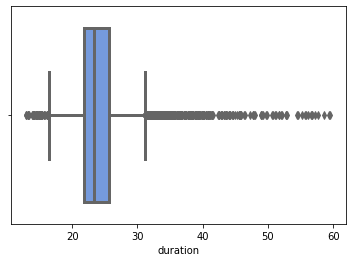

In [ ]:
sns.boxplot(x=pit_stops['duration'], color='cornflowerblue', linewidth=3.0)
plt.show()

**Nous remarquons que la médiane de la colonne "duration" se trouve à plus ou moins 23 secondes. De plus, cette variable possède beaucoup de valeurs extrêmes, donc de très longs ou de très courts pit stops.**

##**3.9. qualifying**

In [ ]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", qualifying.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      qualifying.isnull().sum())
for column in qualifying.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', qualifying[column].dtypes,'\n',
          'Unique values:','\n',
          qualifying[column].unique())

Shape of the table: (8953, 9)
# of null values: 
 qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               134
q3               255
dtype: int64
Name: qualifyId 
 Type: int64 
 Unique values: 
 [   1    2    3 ... 8991 8992 8993]
Name: raceId 
 Type: int64 
 Unique values: 
 [  18   19   20   21   22   23   24   25   26   27   28   29   30   31
   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59
   60   61   62   63   64   65   66   67   68   69   70   77   78   79
   80   81   82   83   84   85   86   87   88   89  104  109  125  140
  156  158  160  161  173  175  176  177  191  192  193  199  200  201
  203  207  208  209  210  211  212  213  214  215  216  224  225  226
  227  228  229  230  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  25

Etudions la validité des valeurs nulles pour les colonnes q1, q2 et q3. Est-ce que qu'elles signifient une non qualification ou seulement le fait que la valeur soit manquante?

In [ ]:
#Création de 3 nouvelles colonnes pour exprimer les présence de valeurs pour les colonnes q1, q2 et q3
qualifying['q1_value'] = ~qualifying['q1'].isnull()
qualifying['q2_value'] = ~qualifying['q2'].isnull()
qualifying['q3_value'] = ~qualifying['q3'].isnull()

In [ ]:
#Jointure avec notre table fusionnée pour récuperer les informations des courses dont les valeurs pour les q1, q2 et q3 ciblées sont manquantes
res_dri_con_rac_qua = pd.merge(res_dri_con_rac,qualifying,how='inner',on='raceId')

In [ ]:
#Regardons une course dont les valeurs sont manquantes pour q1 (et donc q2 et q3)
q1_missing = res_dri_con_rac_qua[res_dri_con_rac_qua['q1_value']==False]
q1_missing = q1_missing[['grid', 'forename', 'surname', 'name_y', 'date', 'q1_value', 'q2_value',	'q3_value']]
q1_missing.head(1)

,grid,forename,surname,name_y,date,q1_value,q2_value,q3_value
77654,10,Fernando,Alonso,Malaysian Grand Prix,2017-10-01,False,False,False


**Par exemple, nous observons que Fernando Alonso n'a pas de donnée entrée pour les 3 qualifications du Malaysian Grand Prix 2017. Pourtant, une rapide recherche sur internet nous montre le contraire. Nous concluons donc que les données de ces 3 colonnes ne sont pas fiables et préférons supprimer toutes les lignes concernées par des valeurs "\\N". Pour étudier les phases de qualifications, nous préférons utiliser les données concernant la place sur la grille lors de la course, ce qui est autant représentatif et plus fiable.**

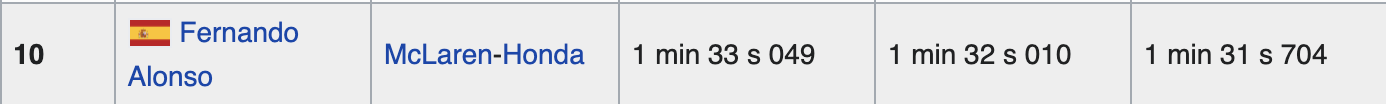

In [ ]:
qualifying = qualifying.drop(qualifying[qualifying.q1_value == False].index)
qualifying = qualifying.drop(qualifying[qualifying.q2_value == False].index)
qualifying = qualifying.drop(qualifying[qualifying.q3_value == False].index)

##**3.10. races**

In [ ]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", races.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      races.isnull().sum())
for column in races.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', races[column].dtypes,'\n',
          'Unique values:','\n',
          races[column].unique())

Shape of the table: (1058, 8)
# of null values: 
 raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64
Name: raceId 
 Type: int64 
 Unique values: 
 [   1    2    3 ... 1071 1072 1073]
Name: year 
 Type: int64 
 Unique values: 
 [2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996
 1995 1994 1993 1992 1991 1990 2010 1989 1988 1987 1986 1985 1984 1983
 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953 1952 1951 1950 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021]
Name: round 
 Type: int64 
 Unique values: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Name: circuitId 
 Type: int64 
 Unique values: 
 [ 1  2 17  3  4  6  5  9 20 11 12 13 14 15 22 18 24  7  8 10 16 19 21 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 

**Nous décidons ici de supprimer 2 colonnes. La première étant "time" car celle-ci comporte des valeurs "\\N" et que notre analyse ne portera pas sur l'heure de la journée de la course. La deuxième est url pour les mêmes raisons que précédemment.**

In [ ]:
del(races['time'])
del(races['url'])

##**3.11. results**

In [ ]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


**Exploration:**

In [ ]:
print("\033[1m" + 'Shape of the table:' + "\033[0m", results.shape)
print("\033[1m" + '# of null values:' + "\033[0m",'\n',
      results.isnull().sum())
for column in results.columns:
    print('Name:', "\033[1m" + column + "\033[0m",'\n',
          'Type:', results[column].dtypes,'\n',
          'Unique values:','\n',
          results[column].unique())

Shape of the table: (25220, 18)
# of null values: 
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64
Name: resultId 
 Type: int64 
 Unique values: 
 [    1     2     3 ... 25223 25224 25225]
Name: raceId 
 Type: int64 
 Unique values: 
 [  18   19   20 ... 1062 1063 1064]
Name: driverId 
 Type: int64 
 Unique values: 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  56
  63  62  59  66  54  55  57  58  60  61  64  65  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84 

Que signifient les valeurs nulles pour la colonne "rank"

In [ ]:
NA_rank = results[results['rank']=='\\N']
display(NA_rank)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
16,17,18,17,9,10,14,\N,R,17,0.0,0,\N,\N,\N,\N,\N,\N,4
17,18,18,18,11,16,12,\N,R,18,0.0,0,\N,\N,\N,\N,\N,\N,4
18,19,18,19,8,19,21,\N,R,19,0.0,0,\N,\N,\N,\N,\N,\N,4
19,20,18,20,5,15,9,\N,R,20,0.0,0,\N,\N,\N,\N,\N,\N,4
20,21,18,21,10,21,16,\N,R,21,0.0,0,\N,\N,\N,\N,\N,\N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,20777,355,30,131,3,8,\N,R,23,0.0,0,\N,\N,\N,\N,\N,\N,4
20775,20778,355,24,10,15,16,\N,R,24,0.0,0,\N,\N,\N,\N,\N,\N,4
24297,24303,745,418,172,21,15,11,11,11,0.0,92,\N,\N,\N,\N,\N,\N,18
24298,24304,717,373,172,2,1,\N,R,12,0.0,54,\N,\N,\N,\N,\N,\N,98


In [ ]:
#Lien avec une incapabilité de terminer la course
print((NA_rank['positionText'].unique()))
#=> Non

['R' 'W' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' 'D' 'F' '18' 'E' 'N' '19' '20' '21' '22' '23' '24' '25' '26'
 '27' '28' '29' '30' '31' '32' '33']


In [ ]:
#Lien avec années de la course?
narank_rac = pd.merge(NA_rank, races, how='inner', on='raceId')
print((narank_rac['year'].unique()))
print((narank_rac['year'].unique().max()))
#=> Oui

[2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 2009 1989 1988 1987 1986 1985 1984 1983 1982
 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968
 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954
 1953 1952 1951 1950 2010]
2010


**Depuis 2010, plus aucune donnée de rank n'est manquante. Nous décidons donc de remplacer ces valeurs par 0 pour ne pas perdre les données des courses concernées et tout de même avec une valeur plausible pour le rank. De plus, l'impact sur la résolution de la question de recherche sera faible étant donné que notre période d'intérêt commence en 2010.**

In [ ]:
#source: https://www.kite.com/python/answers/how-to-replace-values-in-a-pandas-%60dataframe%60-column-based-on-a-conditional-expression-in-python#:~:text=loc()%20to%20replace%20values,the%20new%20value%20to%20assign.
results.loc[results["rank"]=='\\N', "rank"] = 0

Que signifient les valeurs nulles pour la colonne "position"

In [ ]:
results[results.position=='\\N'].head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3
10,11,18,11,8,18,19,\N,R,11,0.0,32,\N,\N,24,15,1:30.892,210.038,7
11,12,18,12,4,6,20,\N,R,12,0.0,30,\N,\N,20,16,1:31.384,208.907,8
12,13,18,13,6,2,4,\N,R,13,0.0,29,\N,\N,23,6,1:28.175,216.510,5


In [ ]:
display(status)

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


Nous remarquons que le "status" 1 correspond à une course dont le coureur a franchi la ligne d'arrivée. Vérifions donc si la valeur '\\N' de "position" correspond donc à une incapabilité à finir la course

In [ ]:
#source: https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/

results.loc[(results['position']=='\\N') & (results['statusId']==1)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId


**Il semble que oui. Gérons donc ces valeurs de la façon suivante: remplacer par 0 les valeurs '\\N' et recoder la colonne "points" pour que celle-ci soit à jour avec le système de points le plus récent en Formule 1 (c.f. https://www.motorsinside.com/f1/actualite/9350-officiel-la-fia-annonce-son-nouveau-systeme-de-points-en-f1-.html#:~:text=Le%20nouveau%20syst%C3%A8me%20d'attribution,y%20a%20bient%C3%B4t%20sept%20ans)**

In [ ]:
#Conversion des String en int64 et remplacement les '//N' par 0
results['position'] = pd.to_numeric(results['position'], errors='coerce').convert_dtypes().fillna(0)
results['position'] = results['position'].astype(int)

In [ ]:
#https://datatofish.com/if-condition-in-pandas-dataframe/
#Introduction du système de points le plus récent en Formule 1 et ce pour toutes les années de la base de données pour permettre la comparaison

results.loc[results['position']==0, 'points'] = 0
results.loc[results['position']==1, 'points'] = 25
results.loc[results['position']==2, 'points'] = 18
results.loc[results['position']==3, 'points'] = 15
results.loc[results['position']==4, 'points'] = 12
results.loc[results['position']==5, 'points'] = 10
results.loc[results['position']==6, 'points'] = 8
results.loc[results['position']==7, 'points'] = 6
results.loc[results['position']==8, 'points'] = 4
results.loc[results['position']==9, 'points'] = 2
results.loc[results['position']==10, 'points'] = 1
results.loc[results['position']>10, 'points'] = 0
results.loc[results['position']>10, 'points'] = 0
results.loc[results['rank']==1, 'points'] += 1

**Pour finir, pour les mêmes raisons que précédement, nous supprimons les lignes dont la valeur est nulle pour "number" et la colonne "milliseconds" de la table. De plus, nous décidons de supprimer la colonne "positionOrder" car celle-ci n'ajoute pas d'information utile à notre résolution**

In [ ]:
results = results.drop(results[results.number == '\\N'].index)
del(results['milliseconds'])
del(results['positionOrder'])

Familiarisons-nous avec les colonnes importantes de cette table à l'aide de boxplots.

<Figure size 720x360 with 0 Axes>

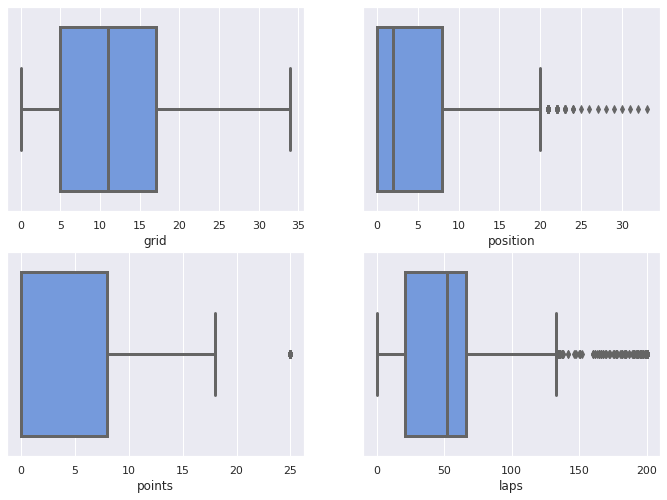

In [ ]:
#source: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,2)
sns.boxplot(x=results['grid'], ax=ax[0,0], color='cornflowerblue', linewidth=3.0)
sns.boxplot(x=results['position'],ax=ax[0,1], color='cornflowerblue', linewidth=3.0)
sns.boxplot(x=results['points'], ax=ax[1,0], color='cornflowerblue', linewidth=3.0)
sns.boxplot(x=results['laps'], ax=ax[1,1], color='cornflowerblue', linewidth=3.0)

**Ces représentations graphiques nous permettent d'avoir une vue d'ensemble sur ces variables. Par exemple, de savoir que des valeurs extrêmes existent pour "position", allant jusqu'à plus de 20. On remarque dès lors que le nombre de coureurs par an varie.**

##**3.12. seasons**

In [ ]:
seasons.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


**Cette table n'apporte aucune information utile, nous la supprimons**

In [ ]:
del(seasons)

##**3.13. Fusion de tables (fin)**

**Fusionnons les tables à nouveau afin de prendre en compte les changements apportés par la phase de cleaning**

In [ ]:
res_dri = pd.merge(results,drivers,how='inner',on='driverId')
res_dri_con = pd.merge(res_dri,constructors,how='inner',on='constructorId')
res_dri_con_rac = pd.merge(res_dri_con,races,how='inner',on='raceId')
res_dri_con_rac_cir = pd.merge(res_dri_con_rac,circuits,how='inner',on='circuitId')

full_table = pd.merge(res_dri_con_rac_cir,status,how='inner',on='statusId')


# **4. Exploratory Data Analysis**


**Remarque:** afin de faciliter la lecture des graphes, nous avons associé
la couleur rouge à Ferrari-Leclerc et la couleur bleu à RedBull-Verstappen.

##**4.1 Ferrari : son histoire et l'un de ses concurrents principaux**

**Dans cette section, nous allons nous concentrer sur l'histoire de Ferrari, ses performances et résultats en les comparant avec ceux de RedBull, un de ses concurrents principaux.**

In [ ]:
#Ferrari
#Nous décidons de classer les courses de Ferrari et RedBull à partir de 2010.
FER_races = full_table[full_table.constructorRef=='ferrari']
FER_races_2010 = FER_races[FER_races['year']>=2010]

#Et son concurrent: RedBull
RED_races = full_table[full_table.constructorRef=='red_bull']
RED_races_2010 = RED_races[RED_races['year']>=2010]

display(FER_races)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,points,laps,time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,forename,surname,dob,nationality_x,url,constructorRef,name_x,nationality_y,year,round,circuitId,name_y,date,circuitRef,name,location,country,status
9,369,36,8,6,6,1,1,1,25.0,58,1:25:28.770,41,1,1:25.235,223.978,1,raikkonen,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,ferrari,Ferrari,Italian,2007,1,1,Australian Grand Prix,2007-03-18,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished
10,374,36,13,6,5,22,6,6,8.0,58,+1:06.805,28,8,1:27.044,219.323,1,massa,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,ferrari,Ferrari,Italian,2007,1,1,Australian Grand Prix,2007-03-18,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished
29,20350,338,4,6,8,3,4,4,12.0,58,+16.304,47,10,1:29.707,212.812,1,alonso,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,ferrari,Ferrari,Italian,2010,2,1,Australian Grand Prix,2010-03-28,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished
30,20349,338,13,6,7,5,3,3,15.0,58,+14.488,52,7,1:29.537,213.216,1,massa,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa,ferrari,Ferrari,Italian,2010,2,1,Australian Grand Prix,2010-03-28,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished
37,20782,841,4,6,5,5,4,4,12.0,58,+31.772,49,2,1:29.487,213.336,1,alonso,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,ferrari,Ferrari,Italian,2011,1,1,Australian Grand Prix,2011-03-27,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25157,20190,817,642,6,32,4,0,R,0.0,51,\N,\N,0,\N,\N,121,farina,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,ferrari,Ferrari,Italian,1952,1,66,Swiss Grand Prix,1952-05-18,bremgarten,Circuit Bremgarten,Bern,Switzerland,Magneto
25164,15067,609,235,6,3,3,0,R,0.0,6,\N,\N,0,\N,\N,94,ickx,Jacky,Ickx,1945-01-01,Belgian,http://en.wikipedia.org/wiki/Jacky_Ickx,ferrari,Ferrari,Italian,1973,5,40,Belgian Grand Prix,1973-05-20,zolder,Zolder,Heusden-Zolder,Belgium,Oil pump
25172,20116,836,647,6,18,5,0,R,0.0,4,\N,\N,0,\N,\N,94,ascari,Alberto,Ascari,1918-07-13,Italian,http://en.wikipedia.org/wiki/Alberto_Ascari,ferrari,Ferrari,Italian,1950,4,66,Swiss Grand Prix,1950-06-04,bremgarten,Circuit Bremgarten,Bern,Switzerland,Oil pump
25196,23700,984,20,6,5,2,0,R,0.0,4,\N,2,19,2:06.457,165.314,105,vettel,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,ferrari,Ferrari,Italian,2017,16,22,Japanese Grand Prix,2017-10-08,suzuka,Suzuka Circuit,Suzuka,Japan,Spark plugs


**1) Date de  première course**

In [ ]:
print("\033[1m" + '1ère de Ferrari:' + "\033[0m", FER_races['date'].min())
print("\033[1m" + '1ère de RedBull:' + "\033[0m", RED_races['date'].min())

1ère de Ferrari: 1950-05-21
1ère de RedBull: 2005-03-06


**Nous observons que Ferrari est une écurie avec plus d'expérience que RedBull.**

**2) Nombre de courses effectuées avec différents pilotes sur les 10 dernières années**

In [ ]:
print("\033[1m" + 'Ferrari:' + "\033[0m",'\n', FER_races_2010['driverRef'].value_counts())
print("\033[1m" + 'RedBull:' + "\033[0m",'\n', RED_races_2010['driverRef'].value_counts())

Ferrari: 
 vettel       119
raikkonen    100
alonso        96
massa         77
leclerc       51
sainz         13
Name: driverRef, dtype: int64
RedBull: 
 max_verstappen    109
ricciardo         100
vettel             96
webber             77
albon              26
kvyat              23
perez              13
gasly              12
Name: driverRef, dtype: int64


**Nous décidons de réaliser un diagramme circulaire afin de mieux représenter nos valeurs.**

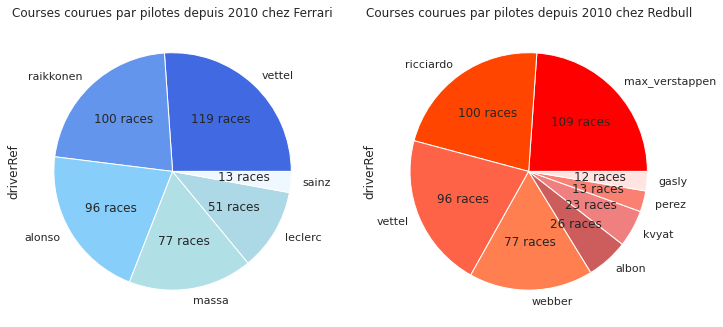

In [ ]:
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
FRE= FER_races_2010['driverRef'].value_counts()
RDE= RED_races_2010['driverRef'].value_counts()


fig, ax = plt.subplots(1,2)
FRE.plot.pie(ax=ax[0], subplots=True,colors = ['royalblue','cornflowerblue','lightskyblue','powderblue','lightblue','aliceblue'], autopct=lambda p:f'{p*sum(FRE)/100 :.0f} races')
RDE.plot.pie(ax=ax[1], subplots=True,colors = ['red','orangered','tomato','coral','indianred','lightcoral','salmon','mistyrose'], autopct=lambda p:f'{p*sum(FRE)/100 :.0f} races')
#nous mettons ax[0] et ax[1] afin d'afficher nos diagrammes côte à côte
ax[0].set_title('Courses courues par pilotes depuis 2010 chez Ferrari')
ax[1].set_title('Courses courues par pilotes depuis 2010 chez Redbull')
fig.show()

**3) Nombre de courses par saison**

In [ ]:
#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
FER_races_grouped = FER_races_2010[['year', 'raceId']].groupby('year', as_index= False).count()
FER_races_grouped = FER_races_grouped.rename(columns={'raceId': 'nbRaces'})
FER_races_grouped

,year,nbRaces
0,2010,38
1,2011,38
2,2012,40
3,2013,38
4,2014,38
5,2015,38
6,2016,42
7,2017,40
8,2018,42
9,2019,42


**4) Points de constructeur par saison**

In [ ]:
#Récupération du round des dernières courses pour chaque saison depuis 2010
round = FER_races_2010[['year', 'round']].groupby('year', as_index= False).max()
round = round.rename(columns={'round': 'lastRound'})
display(round)

,year,lastRound
0,2010,19
1,2011,19
2,2012,20
3,2013,19
4,2014,19
5,2015,19
6,2016,21
7,2017,20
8,2018,21
9,2019,21


In [ ]:
#Nous réalisons ici une jointure entre races et constructor_standings afin de sélectionner seulement les lignes de constructor_standings correspondant aux dernières courses de la saison
#Ensuite, nous faisons une seconde jointure avec constructors pour pouvoir sélectionner les lignes correspondant aux constructeurs ciblés
constan_rac = pd.merge(races, constructor_standings, how='inner', on='raceId')
constan_rac_con = pd.merge(constan_rac, constructors, how='inner', on='constructorId').sort_values('year', axis=0, ascending=False)


constan_rac_last = constan_rac_con.loc[
                   ((constan_rac_con['year']==2010) & (constan_rac_con['round']==19)) |
                   ((constan_rac_con['year']==2011) & (constan_rac_con['round']==19)) |
                   ((constan_rac_con['year']==2012) & (constan_rac_con['round']==20)) |
                   ((constan_rac_con['year']==2013) & (constan_rac_con['round']==19)) |
                   ((constan_rac_con['year']==2014) & (constan_rac_con['round']==19)) |
                   ((constan_rac_con['year']==2015) & (constan_rac_con['round']==19)) |
                   ((constan_rac_con['year']==2016) & (constan_rac_con['round']==21)) |
                   ((constan_rac_con['year']==2017) & (constan_rac_con['round']==20)) |
                   ((constan_rac_con['year']==2018) & (constan_rac_con['round']==21)) |
                   ((constan_rac_con['year']==2019) & (constan_rac_con['round']==21)) |
                   ((constan_rac_con['year']==2020) & (constan_rac_con['round']==17)) |
                   ((constan_rac_con['year']==2021) & (constan_rac_con['round']==13))]

FER_season_position = constan_rac_last[constan_rac_con['constructorRef']=='ferrari']
RED_season_position = constan_rac_last[constan_rac_con['constructorRef']=='red_bull']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
#Affichage des tableaux finaux
FER_season_points=FER_season_position[['year', 'points']]
RED_season_points=RED_season_position[['year', 'points']]
display_side_by_side(FER_season_points,RED_season_points)

,year,points
980,2021,181.5
967,2020,131.0
950,2019,504.0
929,2018,571.0
908,2017,522.0
888,2016,398.0
867,2015,428.0
848,2014,216.0
829,2013,354.0
810,2012,400.0


**Nous décidons de faire un graphique représentant les points de Ferrari et de RedBull depuis 2010 afin d'avoir une idée d'où ils se situent.**

Text(0.5, 1.0, 'Points en fin de saison depuis 2010 entre Ferrari et RedBull ')

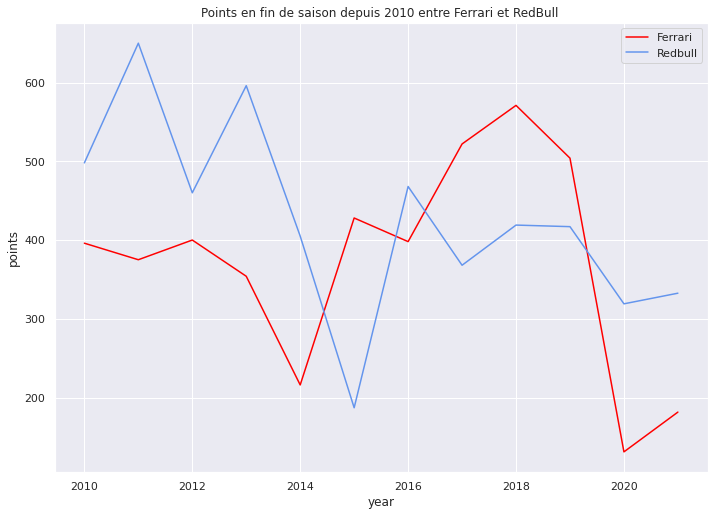

In [ ]:
sns.lineplot(data= FER_season_points, x='year', y='points', legend='brief', label='Ferrari', color = "red")
sns.lineplot(data=RED_season_points, x='year', y='points', legend='brief', label='Redbull', color = "cornflowerblue").set(xlabel='year', ylabel='points')
plt.title("Points en fin de saison depuis 2010 entre Ferrari et RedBull ")

**De 2010 à 2015 RedBull a été devant Ferrari. Après ça, Ferrari a connu une grande croissance au niveau de ses points constructeurs. Cependant, depuis 2020, Ferrari a chuté en terme de points. Nous prenons en compte le fait que la crise du covid-19 a impacté négativement le nombre de courses courues ce qui diminue le nombre de points.**

**5) Score moyen par course et par saison**

In [ ]:
FER_season_position['mean_points'] = FER_season_position['points']/FER_season_position['round']

RED_season_position['mean_points'] = RED_season_position['points']/RED_season_position['round']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Affichage des tableaux finaux

#Ferrari
FER_mean_points=FER_season_position[['year', 'mean_points']]

#RedBull
RED_mean_points=RED_season_position[['year', 'mean_points']]
display_side_by_side(FER_mean_points,RED_mean_points)

,year,mean_points
980,2021,13.961538
967,2020,7.705882
950,2019,24.000000
929,2018,27.190476
908,2017,26.100000
888,2016,18.952381
867,2015,22.526316
848,2014,11.368421
829,2013,18.631579
810,2012,20.000000


**6) Représentation graphique de la position des constructeurs en fonction des années**

Text(0.5, 1.0, 'Position de Ferrari et de RedBull en fonction des années')

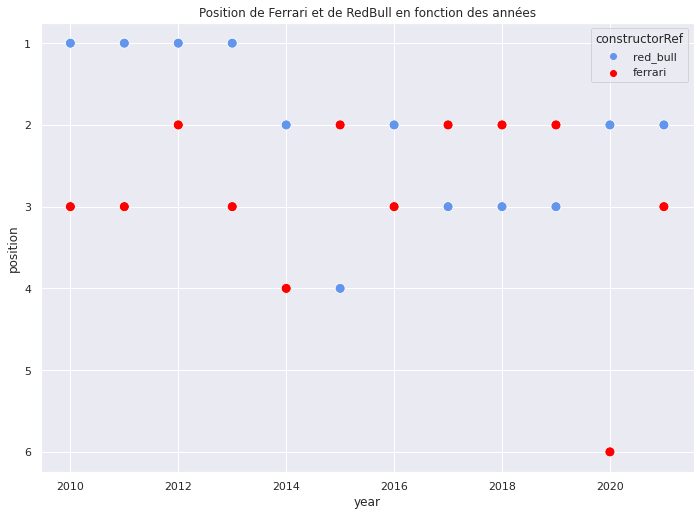

In [ ]:
#https://www.delftstack.com/fr/howto/matplotlib/how-to-revert-axes-in-matplotlib/

#Nous allons chercher les positions finales de RedBull et Ferrari à partir de 2010 afin de voir à quelles positions ils ont terminé le championnat année après année
#Nous représentons ensuite ces valeurs sur un scatterplot.
constan_rac_last_fer_red = constan_rac_last.loc[(constan_rac_last['constructorRef']=='ferrari') | (constan_rac_last['constructorRef']=='red_bull')]
sns.scatterplot(data=constan_rac_last_fer_red, x="year", y="position", hue="constructorRef", s=100, palette = ["cornflowerblue","red"]).invert_yaxis()
plt.title("Position de Ferrari et de RedBull en fonction des années")

**Ce graphe reprend les positions finales de chaque année pour Ferrari et RedBull. Au classement général constructeur de l'année 2010, RedBull a terminé premier, idem pour 2011,2012,2013. RedBull a été très stable dans ses positions constructeur en terminant deuxième ou troisième depuis 2015. Ferrari pour sa part n'a jamais terminé premier entre 2010 et 2020, et a même terminé quatrième et sixième repsectivement en 2014 et 2020.**

**7) 10 meilleurs pit-stops par constructeur**

In [ ]:
best_pitstop = pit_stops[['raceId', 'driverId', 'duration']].groupby(['raceId', 'driverId'], as_index= False).min()
res_best_pitstop = pd.merge(best_pitstop, results, how='inner', on=['raceId', 'driverId'])
res_con_best_pitstop = pd.merge(res_best_pitstop, constructors, how='inner', on='constructorId')

FER_best_pitstop = res_con_best_pitstop[res_con_best_pitstop['constructorRef']=='ferrari'].sort_values('duration', axis=0, ascending=True)
RED_best_pitstop = res_con_best_pitstop[res_con_best_pitstop['constructorRef']=='red_bull'].sort_values('duration', axis=0, ascending=True)
print("\033[1m" + 'Ferrari:' + "\033[0m", '\n', FER_best_pitstop['duration'].head(10))
print("\033[1m" + 'Redbull:' + "\033[0m", '\n', RED_best_pitstop['duration'].head(10))

Ferrari: 
 1054    13.259
1040    14.919
1240    14.943
1384    15.092
1383    15.119
1241    15.174
1173    16.639
1172    16.734
1230    17.354
1118    17.367
Name: duration, dtype: float64
Redbull: 
 1805    13.335
1821    15.008
1996    15.135
2133    15.277
1926    16.453
2092    17.035
1961    17.165
1814    17.290
1987    17.340
1988    17.421
Name: duration, dtype: float64


## **4.2. Charles Leclerc: son histoire et ses concurrents**

**Dans cette partie, nous allons nous concentrer sur le profil de Charles Leclerc. L'objectif étant de récolter un maximum de statistiques nous permettant de préciser nos questions et d'avoir un aperçu sur ses points forts et ses points faibles. Afin d'obtenir des données petinentes, il nous semblait nécessaire de comparer les données de Leclerc à celles de Max Verstappen, récemment champion du monde.
Vous observerez dans cette section les résultats en side_by_side de ceux deux coureurs de Formule 1**

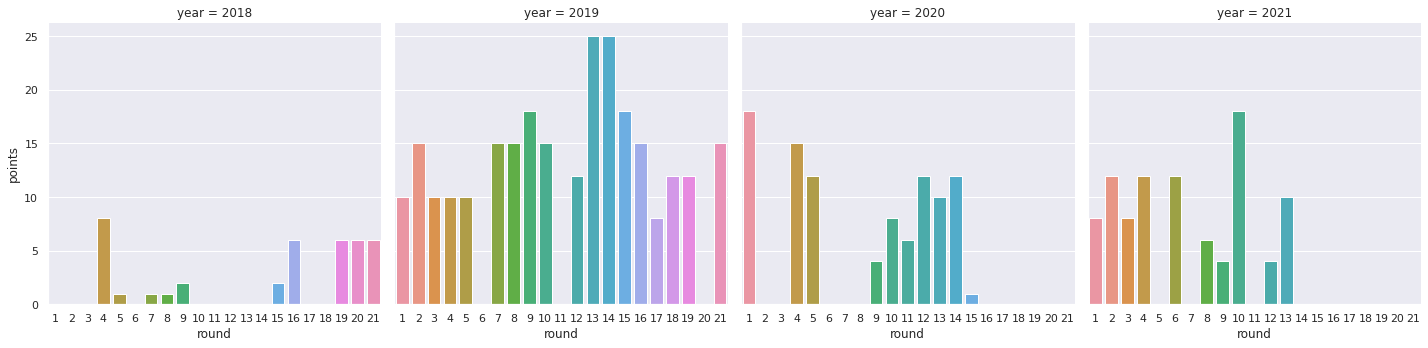

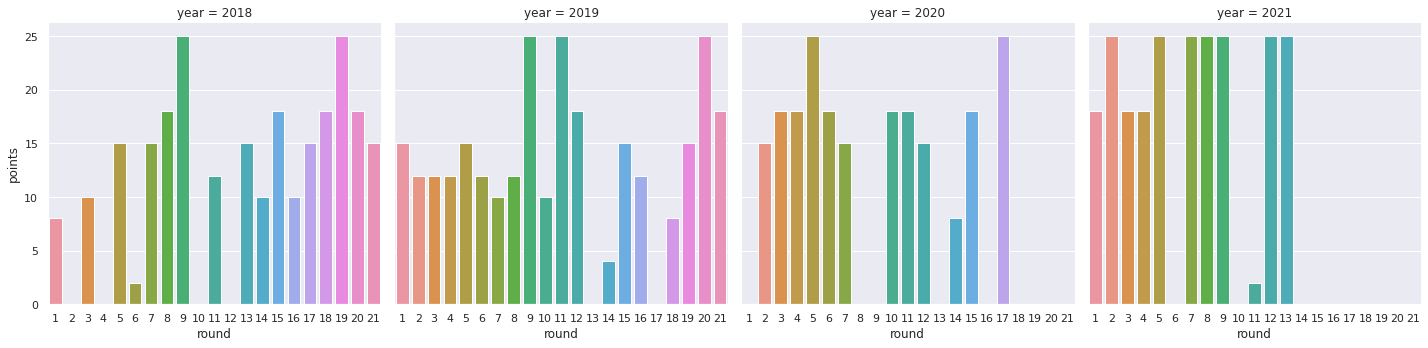

In [ ]:
#Création des tables reprenant l'ensemble de leurs courses
LEC_races = full_table[full_table.driverRef=='leclerc']
VER_races = full_table[full_table.driverRef=='max_verstappen']

#Représentation graphique des points obtenus en fonction des années
sns.catplot(col='year', x='round', y='points', data=LEC_races, kind='bar')
sns.catplot(col='year', x='round', y='points', data=VER_races[VER_races['year']>=2018] , kind='bar')

**En haut:** un aperçu de la carrière de Leclerc
**En bas:** un aperçu de celle de Verstappen depuis 2018

**Dans ce grapique, les colonnes représentent les saisons et les barres représentent les points obtenus à un cerrtain round de la saison. Nous observons directement la consistence dans les points gagnés au fil des saisons chez Verstappen. De plus, Verstappen obtient beaucoup plus rarement 0 point en fin de course (barre nulle).**

**1) Date de sa première et sa dernière course**

In [ ]:
#Leclerc
print("\033[1m" + 'Date du premier GP de F1 de Leclerc:' + "\033[0m",LEC_races['date'].min())
#Verstappen
print("\033[1m" + 'Date du premier GP de F1 de Verstappen:' + "\033[0m",VER_races['date'].min())

Date du premier GP de F1 de Leclerc: 2018-03-25
Date du premier GP de F1 de Verstappen: 2015-03-15


**On remarque ici que Max Verstappen a commencé la Formule 1 plutôt que Charles Leclerc.**

In [ ]:
#Leclerc
print("\033[1m" + 'Date du dernier GP de F1 de Leclerc:' + "\033[0m",LEC_races['date'].max())
#Verstappen
print("\033[1m" + 'Date du dernier GP de F1 de Verstappen:' + "\033[0m",VER_races['date'].max())

Date du dernier GP de F1 de Leclerc: 2021-09-05
Date du dernier GP de F1 de Verstappen: 2021-09-05


**Cette date correspond à la dernière course introduit dans notre dataset. Sans suprise donc, ces deux coureurs sont encore actifs en Formule 1.**

**2) Nombre de courses effectuées sous ses différents constructeurs**

In [ ]:
print("\033[1m" + 'Leclerc:\n' + "\033[0m",LEC_races['constructorRef'].value_counts())

print("\033[1m" + 'Verstappen:\n' + "\033[0m",VER_races['constructorRef'].value_counts())

Leclerc:
 ferrari    51
sauber     21
Name: constructorRef, dtype: int64
Verstappen:
 red_bull      109
toro_rosso     23
Name: constructorRef, dtype: int64


**Nous remarquons que Charles Leclerc à couru avec l'écurie Sauber à son arrivée en F1 en 2018 et a donc participé à 21 courses.
En 2019, il rejoint la Scuderia Ferrari et participe à la saison 2019, 2020 et 2021 avec celle-ci. Depuis son arrivée dans cette écurie italienne, il a couru 51 courses.
Verstappen a donc couru 60 Grand Prix de plus que Leclerc.**

**3) Nombre de courses par saison**

In [ ]:
#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

#Grouper toutes les courses sur l'année et compter de le nombre d'instance
LEC_races_grouped = LEC_races[['year', 'raceId']].groupby('year', as_index= False).count()
LEC_races_grouped = LEC_races_grouped.rename(columns={'raceId': 'nbRaces'})

VER_races_grouped = VER_races[['year', 'raceId']].groupby('year', as_index= False).count()
VER_races_grouped = VER_races_grouped.rename(columns={'raceId': 'nbRaces'})


display_side_by_side(LEC_races_grouped,VER_races_grouped)

,year,nbRaces
0,2018,21
1,2019,21
2,2020,17
3,2021,13
,year,nbRaces
0,2015,19
1,2016,21
2,2017,20
3,2018,21
4,2019,21


**4) Score par saison**

In [ ]:
#Grouper sur l'année et faire la somme des points gagnés
LEC_races_grouped = LEC_races[['year', 'points']].groupby('year', as_index= False).sum()

VER_races_grouped = VER_races[['year', 'points']].groupby('year', as_index= False).sum()

display_side_by_side(LEC_races_grouped,VER_races_grouped)

,year,points
0,2018,39.0
1,2019,260.0
2,2020,98.0
3,2021,94.0
,year,points
0,2015,49.0
1,2016,204.0
2,2017,168.0
3,2018,249.0
4,2019,275.0


Text(0.5, 1.0, 'Points en fin de saison depuis 2015 entre Leclerc et Verstappen')

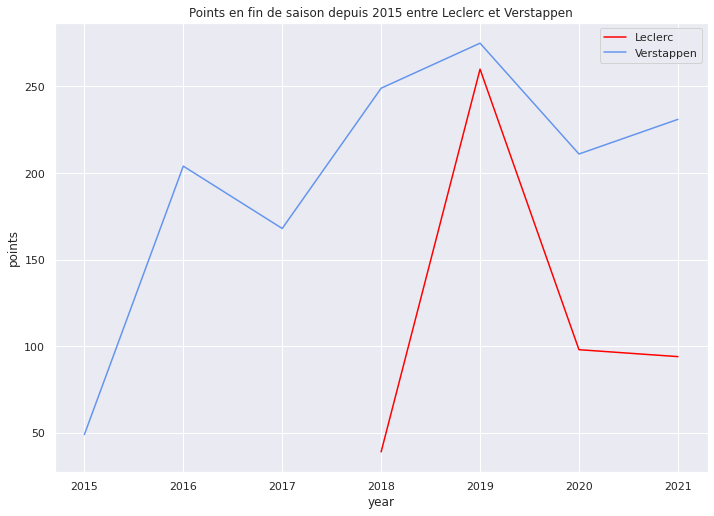

In [ ]:
#représenter graphiquement la somme des points gagnés en fonction des années
sns.lineplot(data=LEC_races_grouped, x='year', y='points', legend='brief', label='Leclerc', color = 'red')
sns.lineplot(data=VER_races_grouped, x='year', y='points', legend='brief', label='Verstappen', color='cornflowerblue').set(xlabel='year', ylabel='points')
plt.title("Points en fin de saison depuis 2015 entre Leclerc et Verstappen")


**On observe que Verstappen a connu une expansion fulgurante ces 6 dernières années et maintient une croissance en 2021 après l'année chamboulée que fut 2020. En ce qui concerne Leclerc, il a réalisé une bonne saison en 2019, totalisant 260 points à son arrivée à la Scuderia Ferrari. Néanmoins, il n'as pas tenu cette croissance constante par la suite.
Notez qu'en ce qui concerne l'année 2021, la saison n'est pas encore terminée.**

**5) Score moyen par course et par saison**

In [ ]:
#grouper sur les années et faire la moyenne des points
LEC_races_grouped = LEC_races[['year', 'points']].groupby('year', as_index= False).mean()
LEC_races_grouped = LEC_races_grouped.rename(columns={'points': 'points_mean'})

VER_races_grouped = VER_races[['year', 'points']].groupby('year', as_index= False).mean()
VER_races_grouped = VER_races_grouped.rename(columns={'points': 'points_mean'})

display_side_by_side(LEC_races_grouped,VER_races_grouped)

,year,points_mean
0,2018,1.857143
1,2019,12.380952
2,2020,5.764706
3,2021,7.230769
,year,points_mean
0,2015,2.578947
1,2016,9.714286
2,2017,8.400000
3,2018,11.857143
4,2019,13.095238


**Nous remarquons que la moyenne de Verstappen a été plus élevée dès le début de sa carrière . Elle a eu tendance à croître d'année en année pour arriver en septembre 2021 à une moyenne de 17. A contrario, Leclerc a fait une très bonne deuxième saison mais sa moyenne a descendue par la suite. Leclerc semble dès lors beaucoup moins constent que Verstappen.**

**6) Nombre de fois qu'il a atteint une certaine position en fin de course**

In [ ]:
#sélection des courses postérieures à 2018 (l'année de début pour Leclerc) afin de ne pas fausser les résultats
LEC_races_2018 = LEC_races[LEC_races['year']>=2018]
VER_races_2018 = VER_races[VER_races['year']>=2018]

In [ ]:
#grouper sur les positions et compter le nombre de courses correspondant
LEC_finish_races = LEC_races_2018[['position', 'raceId']].groupby('position', as_index= False).count()
LEC_finish_races = LEC_finish_races.rename(columns={'raceId': 'Leclerc'})
LEC_finish_races = LEC_finish_races.sort_values('position', axis=0, ascending=True)

VER_finish_races = VER_races_2018[['position', 'raceId']].groupby('position', as_index= False).count()
VER_finish_races = VER_finish_races.rename(columns={'raceId': 'Verstappen'})
VER_finish_races = VER_finish_races.sort_values('position', axis=0, ascending=True)

display_side_by_side(LEC_finish_races,VER_finish_races)

,position,Leclerc
0,0,14
1,1,2
2,2,4
3,3,7
4,4,9
5,5,6
6,6,5
7,7,6
8,8,3
9,9,2


In [ ]:
#jointure extérieure pour ne pas passer à côté des valeurs de position qui ne sont pas partagées par les deux pilotes
#passer en int les colonnes 'Verstappen' et 'Leclerc' et égaler à 0 les valeurs NaN suite à la jointure
LEC_VER_finish = pd.merge(LEC_finish_races,VER_finish_races,how='outer', on='position')
LEC_VER_finish['Verstappen'] = pd.to_numeric(LEC_VER_finish['Verstappen'], errors='coerce').convert_dtypes().fillna(0)
LEC_VER_finish['Leclerc'] = pd.to_numeric(LEC_VER_finish['Leclerc'], errors='coerce').convert_dtypes().fillna(0)
LEC_VER_finish

,position,Leclerc,Verstappen
0,0,14,13
1,1,2,14
2,2,4,15
3,3,7,12
4,4,9,7
5,5,6,5
6,6,5,3
7,7,6,0
8,8,3,1
9,9,2,2


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


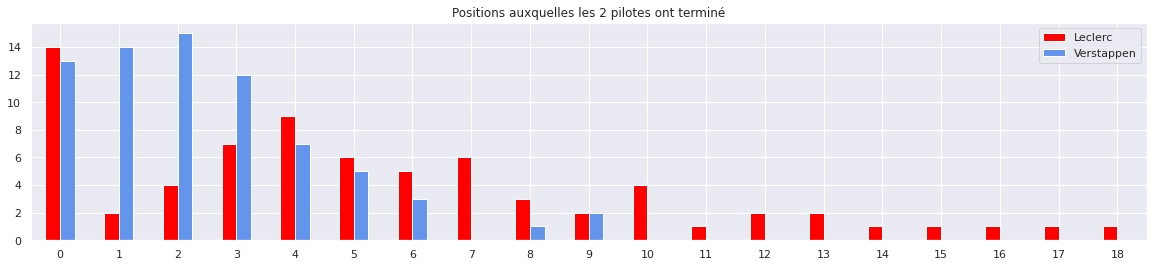

In [ ]:
#représentation graphique du nombre de positions en fin de course pour Leclerc et Verstappen
LEC_VER_finish[['Leclerc', 'Verstappen']].plot.bar(title='Positions auxquelles les 2 pilotes ont terminé',stacked=False,figsize=(20,4),colormap='Paired', rot=0, color=['red', 'cornflowerblue'])
plt.show()

**Il est très facilement observable que Verstappen a été beaucoup plus de fois premier, deuxième et troisième que Leclerc. Ce qui est très marquant, c'est que Verstappen n'a jamais dépassé la neuvième position. Même en terme d'abandon (position 0), Verstappen se trouve en dessous de Leclerc. Néanmoins, il est a noter que Leclerc terminé 2 courses premier, 4 courses deuxième, 7 courses troisième et 9 courses quatrième.**

**7) Nombre de fois qu'il a commencé sur une certaine place de la grille**

In [ ]:
#grouper sur la position dans la grille et compter le nombre de courses correspondant
#renomer les colonnes et trier les valeurs sur "position" par ordre croissant
LEC_grid = LEC_races_2018[['grid', 'raceId']].groupby('grid', as_index= False).count()
LEC_grid = LEC_grid.rename(columns={'grid' : 'position', 'raceId': 'Leclerc'})
LEC_grid = LEC_grid.sort_values('position', axis=0, ascending=True)

VER_grid = VER_races_2018[['grid', 'raceId']].groupby('grid', as_index= False).count()
VER_grid = VER_grid.rename(columns={'grid' : 'position', 'raceId': 'Verstappen'})
VER_grid = VER_grid.sort_values('position', axis=0, ascending=True)

display_side_by_side(LEC_grid,VER_grid)

,position,Leclerc
0,1,9
1,2,1
2,3,4
3,4,11
4,5,4
5,6,1
6,7,7
7,8,5
8,9,6
9,10,3


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:227: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:28: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  "'color' and 'colormap' cannot be used simultaneously. Using 'color'"


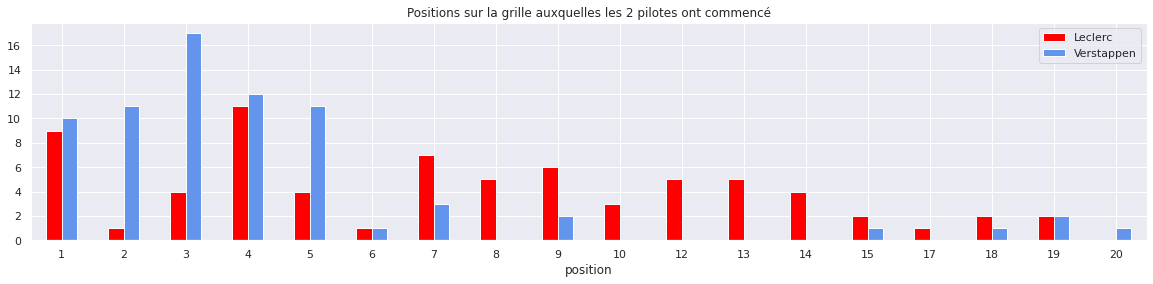

In [ ]:
#jointure extérieur, conversion en int et mise à 0 des valeurs manquantes
LEC_VER_grid = pd.merge(LEC_grid, VER_grid, how='outer', on='position')
LEC_VER_grid['Leclerc'] = pd.to_numeric(LEC_VER_grid['Leclerc'], errors='coerce').convert_dtypes().fillna(0)
LEC_VER_grid['Verstappen'] = pd.to_numeric(LEC_VER_grid['Verstappen'], errors='coerce').convert_dtypes().fillna(0)
LEC_VER_grid.plot.bar(x='position', y=['Leclerc', 'Verstappen'], title='Positions sur la grille auxquelles les 2 pilotes ont commencé',stacked=False,figsize=(20,4),colormap='Paired', rot = 0, color=[ 'red','cornflowerblue'])

**Nous observons que Verstappen campe les premières places de la grille de par ses qualifications souvent réussies quand Leclerc est un adepte des places plus éloignées.**

**8) Moyenne et écart-type de ses positions sur la grille en fonction des années (utile pour le point 6)**

In [ ]:
#grouper sur les années et calculer la moyenne des valeurs du grid correspondantes
LEC_grid_mean = LEC_races_2018[['year', 'grid']].groupby('year', as_index= False).mean()
LEC_grid_mean = LEC_grid_mean.rename(columns={'grid' : 'grid_mean'})
LEC_grid_mean = LEC_grid_mean.sort_values('year', axis=0, ascending=True)
LEC_grid_mean

,year,grid_mean
0,2018,12.428571
1,2019,4.285714
2,2020,8.470588
3,2021,5.615385


In [ ]:
#https://stackoverflow.com/questions/25915225/pandas-dataframe-groupby-to-calculate-population-standard-deviation
#calcul de l'écart-type
LEC_grid_std = LEC_races_2018[['year', 'grid']].groupby('year', as_index= False).agg(np.std, ddof=0)
LEC_grid_std = LEC_grid_std.rename(columns={'grid' : 'grid_std'})
LEC_grid_std = LEC_grid_std.sort_values('year', axis=0, ascending=True)
LEC_grid_std

,year,grid_std
0,2018,3.982957
1,2019,4.049019
2,2020,3.549940
3,2021,3.000986


**On remarque que l'amélioration des performances de Charles Leclerc est en dents de scie. Une variation de la moyenne et de l'écart-type de +97 et -12% entre 2019 et 2020 par rapport à -34% et -15% de 2020 à 2021**

**9) Comparaison entre la fréquence de position dans grille et la position finale?**

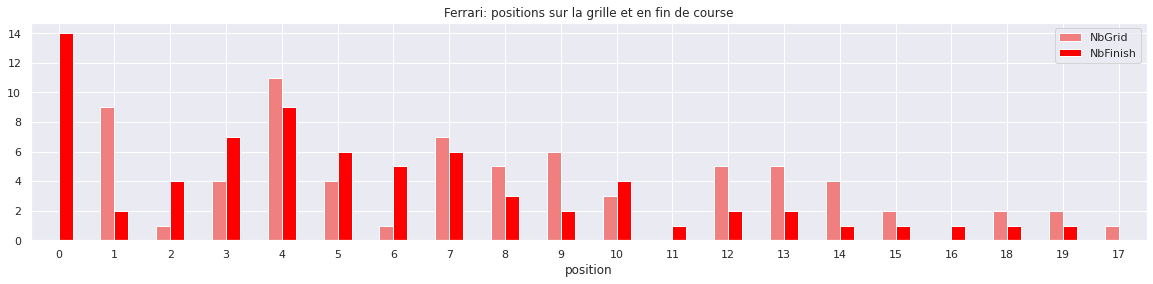

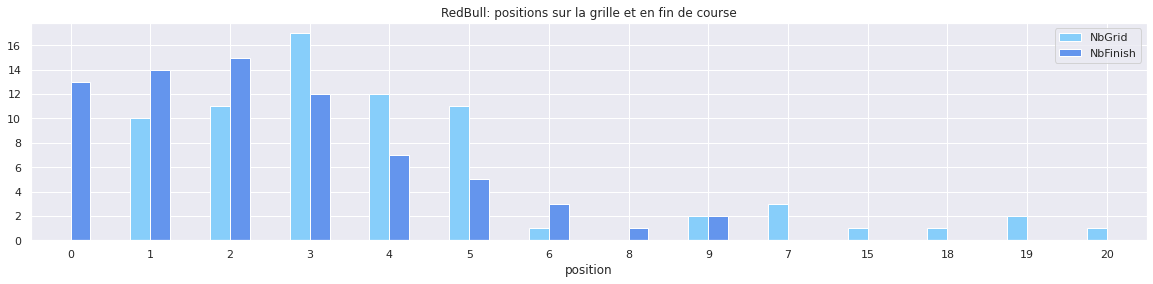

In [ ]:
#rename, jointure extérieur, passage en int et remise à 0 des valeurs manquantes, représentation graphique
LEC_finish_races_new = LEC_finish_races.rename(columns={'Leclerc': 'NbFinish'})
LEC_grid_new = LEC_grid.rename(columns={'Leclerc': 'NbGrid'})
LEC_grid_finish = pd.merge(LEC_finish_races_new, LEC_grid_new,how='outer', on='position')
LEC_grid_finish['NbFinish'] = pd.to_numeric(LEC_grid_finish['NbFinish'], errors='coerce').convert_dtypes().fillna(0)
LEC_grid_finish['NbGrid'] = pd.to_numeric(LEC_grid_finish['NbGrid'], errors='coerce').convert_dtypes().fillna(0)

LEC_grid_finish.plot.bar(x='position', y=['NbGrid','NbFinish'],stacked=False, figsize=(20,4),color=['lightcoral','red'],rot=0)
plt.title('Ferrari: positions sur la grille et en fin de course')
plt.show()


VER_finish_races_new = VER_finish_races.rename(columns={'Verstappen': 'NbFinish'})
VER_grid_new = VER_grid.rename(columns={'Verstappen': 'NbGrid'})
VER_grid_finish = pd.merge(VER_finish_races_new, VER_grid_new,how='outer', on='position')
VER_grid_finish['NbFinish'] = pd.to_numeric(VER_grid_finish['NbFinish'], errors='coerce').convert_dtypes().fillna(0)
VER_grid_finish['NbGrid'] = pd.to_numeric(VER_grid_finish['NbGrid'], errors='coerce').convert_dtypes().fillna(0)


VER_grid_finish.plot.bar(x='position', y=['NbGrid','NbFinish'],stacked=False, figsize=(20,4),color=[ 'lightskyblue','cornflowerblue'],rot=0)
plt.title('RedBull: positions sur la grille et en fin de course')
plt.show()

**On remarque, sur base des deux grapiques et tables précedentes, que Leclerc a commencé 9 fois premier sur la grille mais n'as terminé que 2 fois à cette position. A l'inverse Verstappen terme le plus souvent dans une bonne position et ce peu importe sa place sur la grille.**

**Mais qu'elle est l'influence de la place dans la grille sur la position finale? voir suite du projet.**


**10) Représentation graphique de la position en fonction des années**

In [ ]:
#définition des variables nécessaires aux grapiques
xL=LEC_races['year']
yL=LEC_races['position']

xV= VER_races['year']
yV= VER_races['position']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


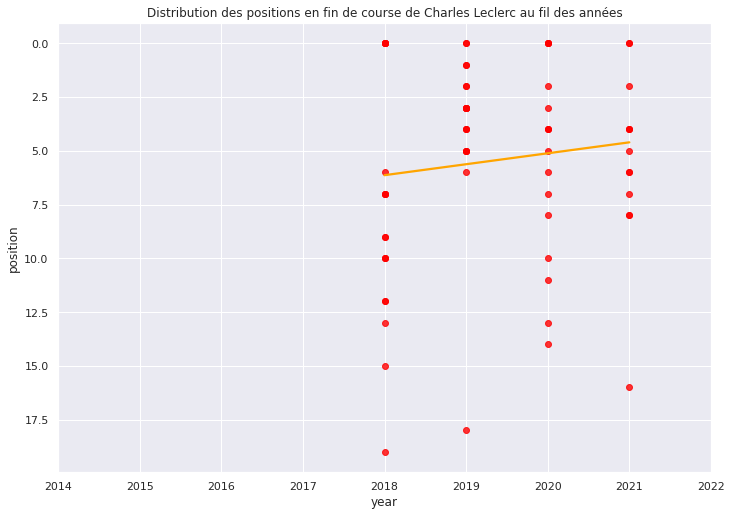

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


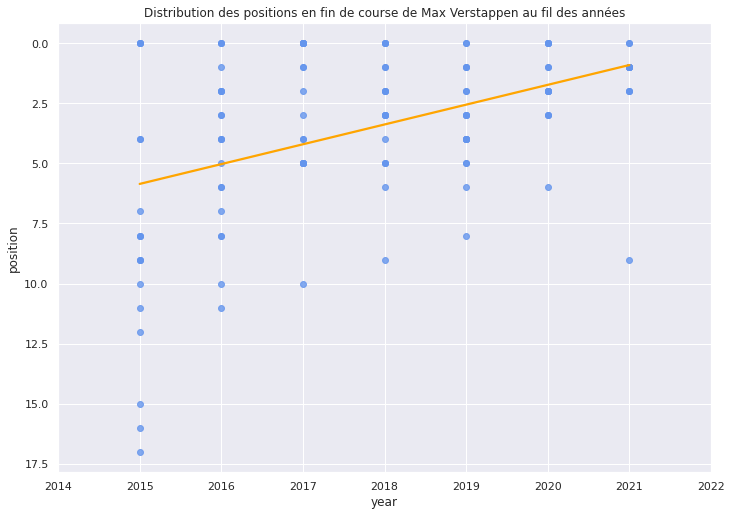

In [ ]:
#https://pretagteam.com/question/different-colors-for-points-and-line-in-seaborn-regplot
#utilisation d'un regplot pour pouvoir analyser la "line of best fit", donc la tendance générale.

# Pour Charles Leclerc
fig, ax = plt.subplots()
sns.regplot(xL, yL, ci=None,scatter_kws={"color": "red"}, line_kws={"color": "orange"}, ax=ax).invert_yaxis()
ax.set_xlim(2014,2022)
plt.title("Distribution des positions en fin de course de Charles Leclerc au fil des années")
plt.show()

# Pour Max Verstappen
fig, ax = plt.subplots()
sns.regplot(xV, yV, ci=None,scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "orange"}).invert_yaxis()
ax.set_xlim(2014,2022)
plt.title("Distribution des positions en fin de course de Max Verstappen au fil des années")
plt.show()

 **La droite de régression représente la tendance générale des positions auxquelles Leclerc a terminé en fonction des années. on aperçoit donc une  petite amélioration au fur et à mesure des années car la droite tend vers des valeurs de positions plus faibles. Cependant, celle-ci n'est pas autant marqué que celle de Max Verstappen donc la croissance est constante au long de sa carrière.**




**11) Nombre de points totaux en fonction du circuit?**

In [ ]:
#grouper sur les circuits et faire la somme des points
LEC_races_grouped = LEC_races_2018[['circuitRef', 'points']].groupby('circuitRef', as_index= False).sum()
LEC_races_grouped = LEC_races_grouped.sort_values('points', axis=0, ascending=False)
LEC_races_grouped


VER_races_grouped = VER_races_2018[['circuitRef', 'points']].groupby('circuitRef', as_index= False).sum()
VER_races_grouped = VER_races_grouped.sort_values('points', axis=0, ascending=False)
VER_races_grouped

display_side_by_side(LEC_races_grouped,VER_races_grouped)

,circuitRef,points
20,silverstone,60.0
16,red_bull_ring,48.0
0,BAK,30.0
21,sochi,29.0
22,spa,29.0
12,monza,25.0
3,bahrain,24.0
4,catalunya,23.0
7,imola,22.0
25,yas_marina,21.0


[Text(0, 0, 'red_bull_ring'),
 Text(0, 0, 'catalunya'),
 Text(0, 0, 'yas_marina'),
 Text(0, 0, 'ricard'),
 Text(0, 0, 'spa'),
 Text(0, 0, 'silverstone'),
 Text(0, 0, 'bahrain'),
 Text(0, 0, 'interlagos'),
 Text(0, 0, 'sochi'),
 Text(0, 0, 'monaco'),
 Text(0, 0, 'hungaroring'),
 Text(0, 0, 'hockenheimring'),
 Text(0, 0, 'marina_bay'),
 Text(0, 0, 'portimao'),
 Text(0, 0, 'rodriguez'),
 Text(0, 0, 'americas'),
 Text(0, 0, 'imola'),
 Text(0, 0, 'villeneuve'),
 Text(0, 0, 'zandvoort'),
 Text(0, 0, 'albert_park'),
 Text(0, 0, 'shanghai'),
 Text(0, 0, 'nurburgring'),
 Text(0, 0, 'suzuka'),
 Text(0, 0, 'monza'),
 Text(0, 0, 'BAK'),
 Text(0, 0, 'istanbul'),
 Text(0, 0, 'mugello')]

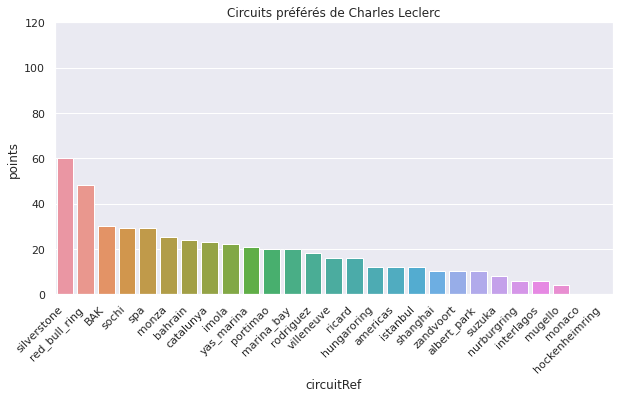

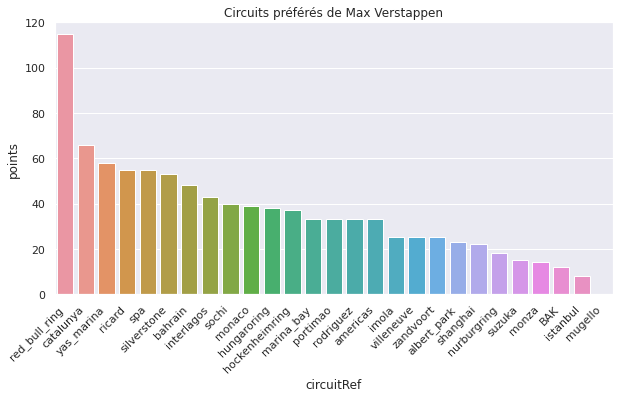

In [ ]:
#source: https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
#source: https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
#source: https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid

#representation grapique sous forme de barplot avec des échelles équivalentes pour l'axe des y

plt.figure(figsize=(10,5))
chart1 = sns.barplot(data = LEC_races_grouped,  x='circuitRef', y = 'points')
chart1.set_title("Circuits préférés de Charles Leclerc")
chart1.set(ylim=(0, 120))
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.figure(figsize=(10,5))
chart2= sns.barplot(data = VER_races_grouped,  x='circuitRef', y = 'points')
chart2.set_title("Circuits préférés de Max Verstappen")
chart2.set(ylim=(0, 120))
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45, horizontalalignment='right')

**Nous remarquons que le circuit où Leclerc a réalisé ses meilleures courses est Silverstone en Angleterre quant à Max Verstappen, c'est au Red Bull Ring qu'il a été le meilleur.**

**12) Nombre de fois qu'une certaine circonstance apparait**

In [ ]:
LEC_races_lose = LEC_races[LEC_races['points']==0]
LEC_races_grouped = LEC_races_lose[['raceId', 'status']].groupby('status', as_index= False).count()
LEC_races_grouped = LEC_races_grouped.rename(columns={'raceId': 'NbTimes'})
LEC_races_grouped = LEC_races_grouped.sort_values('NbTimes', axis=0, ascending=False)
LEC_races_grouped


VER_races_lose = VER_races[VER_races['points']==0]
VER_races_grouped = VER_races_lose[['raceId', 'status']].groupby('status', as_index= False).count()
VER_races_grouped = VER_races_grouped.rename(columns={'raceId': 'NbTimes'})
VER_races_grouped = VER_races_grouped.sort_values('NbTimes', axis=0, ascending=False)
VER_races_grouped

display_side_by_side(LEC_races_grouped,VER_races_grouped)

,status,NbTimes
0,+1 Lap,6
2,Collision,5
1,Accident,3
6,Finished,3
3,Collision damage,2
4,Driveshaft,1
5,Electronics,1
7,Mechanical,1
8,Suspension,1
9,Tyre,1


[Text(0.5, 1.0, 'Nombre de fois que Max Verstappen rencontre différents status')]

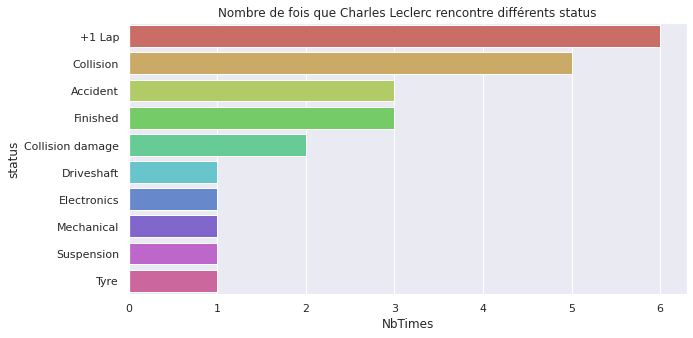

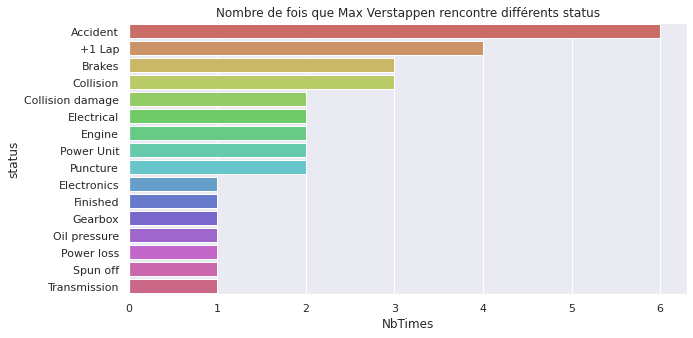

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = LEC_races_grouped , x= 'NbTimes', y= 'status', palette='hls').set(title = 'Nombre de fois que Charles Leclerc rencontre différents status')



plt.figure(figsize=(10,5))
sns.barplot(data = VER_races_grouped , x= 'NbTimes', y= 'status', palette='hls').set(title = 'Nombre de fois que Max Verstappen rencontre différents status')




**En ce qui concerne Charles Leclerc, ses causes d'abandon sont le plus souvent un accident ou des collisions avec d'autres pilotes ce qui nous assure de la fiabilité des voitures de Ferrari. Pour ce qui est Max Verstappen, celui-ci compte beaucoup de problèmes liés à la voiture (Brakes, Electrical, Engine, etc.) et plus d'accidents que Leclerc. On peut donc conclure qu'il adopte une conduite risquée et que certains progrès sont à faire sur les voitures que produisent RedBull.**

## **4.3. Question 1: Quelle corrélation existe-t-il entre la place dans la grille de départ et la position finale?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation between grid position and final position')

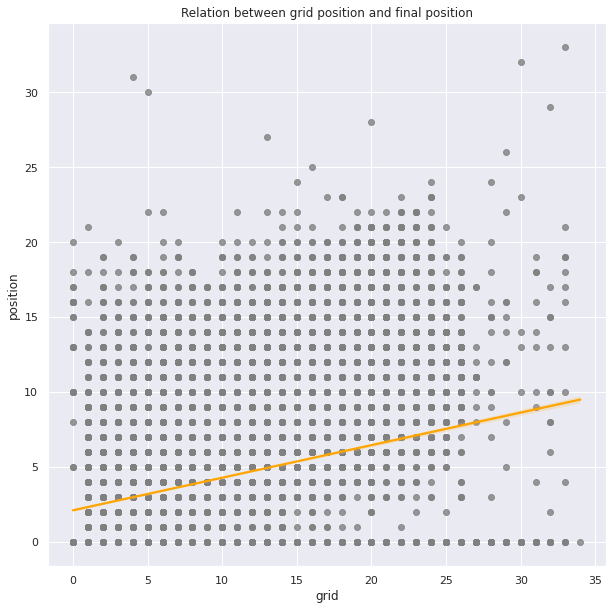

In [ ]:
#source: https://stackoverflow.com/questions/37234163/how-to-add-a-line-of-best-fit-to-scatter-plot
#source: https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
plt.figure(figsize=(10,10))
sns.regplot(results['grid'],results['position'], scatter_kws={"color": "grey"}, line_kws={"color": "orange"}).set_title("Relation between grid position and final position")

In [ ]:
correlation = results['grid'].corr(results['position'])
print(correlation)

0.29658936761052074


**On observe une corrélation qui reste néanmoins faible. Voir suite du raisonnement à la partie 6.**

## **4.4. Question 2: Quelle corrélation existe-t-il entre le meilleur temps des pit stops pour une course et un pilote et la position finale?**

In [ ]:
best_pitstop = pit_stops[['raceId', 'driverId', 'duration']].groupby(['raceId', 'driverId'], as_index= False).min()
re_best_pitstop = pd.merge(best_pitstop, results, how='inner', on=['raceId', 'driverId'])
re_best_pitstop['duration']

0       23.199
1       22.994
2       23.716
3       23.251
4       24.865
         ...  
4103    18.634
4104    20.646
4105    19.850
4106    19.999
4107    24.578
Name: duration, Length: 4108, dtype: float64

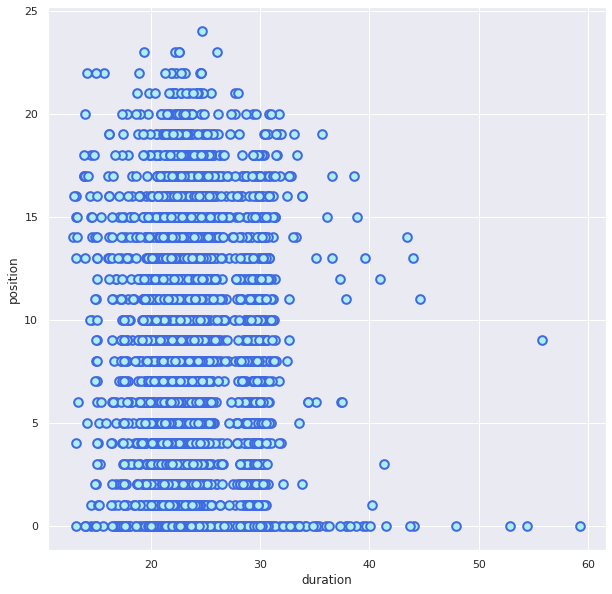

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = re_best_pitstop,x = "duration",  s=75, y = "position",linewidth=2,edgecolor = 'royalblue', color ='paleturquoise')


In [ ]:
correlation = re_best_pitstop['duration'].corr(re_best_pitstop['position'])
print(correlation)

-0.021825316379393687


**On observe que le coefficient de correlation n'est pas du tout concluant entre ces deux variables.**

On remarque qu'il n'y pas une forte corrélation => on décide de ne pas s'y attaquer dans le machine learning

# **5. Feature Engineering**





**Tout au long de la partie 3 et 4, nous avons extrait des données de colonnes existantes dans le but d'en créer de nouvelles.**

**Par exemple pour le point 3,** les colonnes q1,q2 et q3_value dans la table qualifying (3.9 cellule 45) ou encore la nouvelle colonne points dans la table results (3.11 cellule 59).

**En ce qui concerne la partie 4,** à de nombreuses reprises nous avons utilisé des groupby pour extraire et manipuler des données existantes pour remplir de nouvelles colonnes. Par exemple, le nombre de points finaux par saison et par constructeur (4.1 point 4) et de nombreuses autres colonnes.

# **6. Predictive analysis**

Regardons les relations qu'il existe entre les différentes variables de notre dataset:

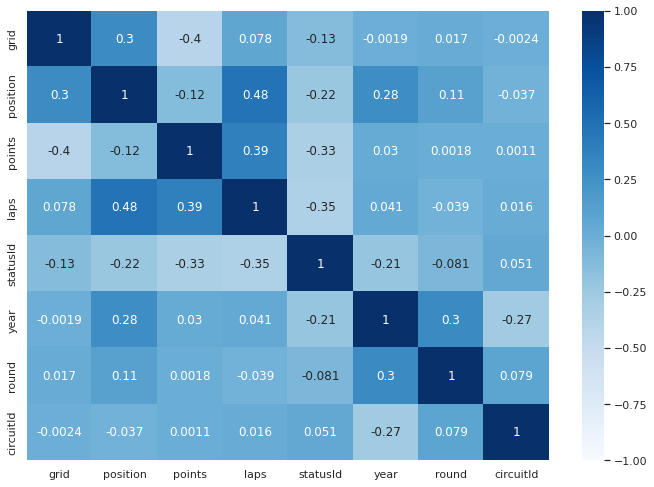

In [ ]:
#représentation graphique des coefficients de corrélation sous la forme d'un heatmap entre les colonnes de la "full_table" dont on a dropé les tables concernant les Id
full_table_without_id = full_table.drop(['resultId', 'raceId', 'driverId', 'constructorId'],axis = 1)
sns.heatmap(full_table_without_id.corr(), cmap = 'Blues', vmin = '-1', annot=True)
sns.set(rc = {'figure.figsize':(15, 10)})

<Figure size 1080x576 with 0 Axes>

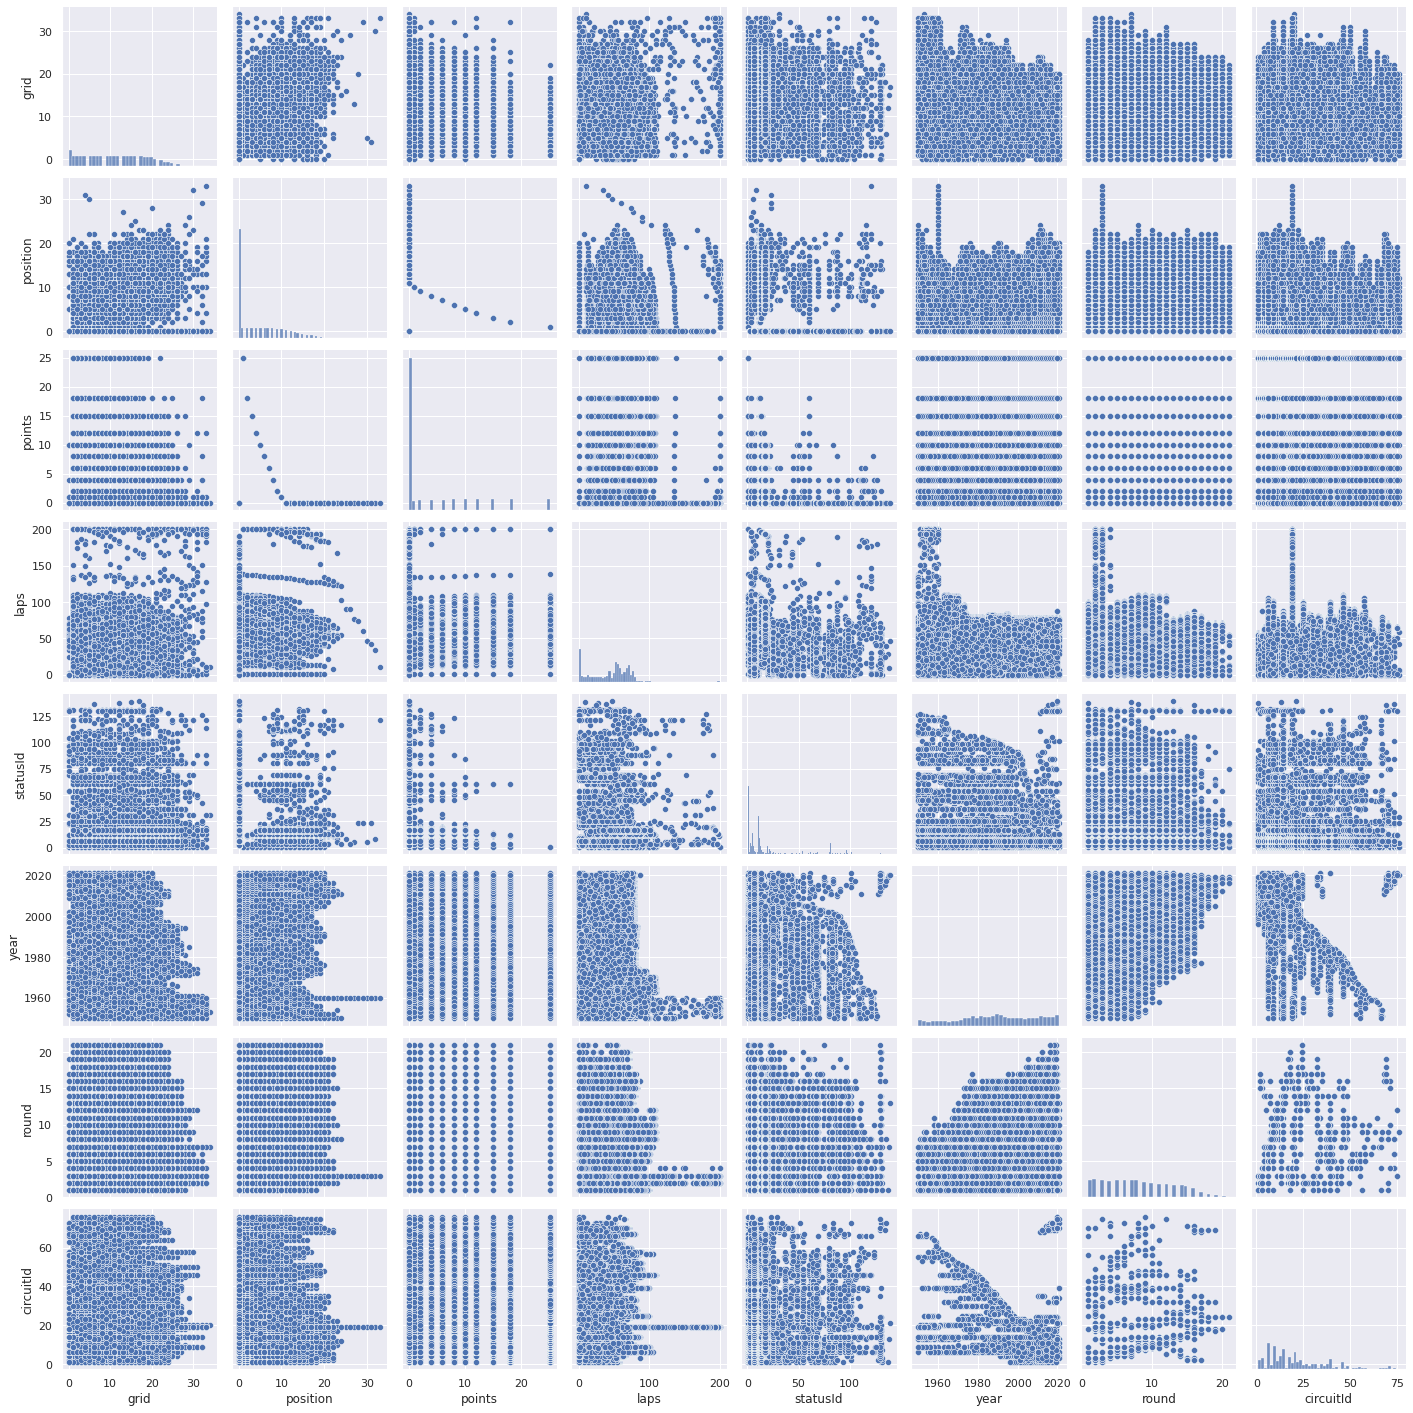

In [ ]:
#représentation graphique sous la forme d'un pairplot des relations entre les colonnes de la "full_table_without_id"
plt.figure(figsize=(15,8))
sns.pairplot(full_table_without_id)

**Nous remarquons directement certaines relations de corrélation entre les variables de notre dataset. Par exemple, le lien entre "laps" et "position" ou encore "grid" et "position". Pour l'instant, concentrons nous sur cette dernière car la place dans la grille dépend des qualifications et représente donc pour Charles Leclerc un vector d'amélioration potentiel.**

### Question: Quel intervalle de points Charles Leclerc peut-il s'attendre à gagner en fin de saison s'il augmente sa moyenne de la position dans la grille de 2?

Dans cette partie, nous allons commencer par analyser le comportement de la colonne "position" en fonction de celui de "grid". Ensuite, nous essayerons de tirer profit de cette relation en concluant un intervalle de points que Charles Leclerc pourrait s'attendre à gagner en fin de saison suite à une augmentation de la moyenne de sa place dans la grille.

**Le plan est le suivant:**

**1)** Entrainer un modèle de regression linéaire permettant de prédire la position finale en fonction de la place sur la grille de départ. Ceci sur base de toutes les courses enregistrées dans notre dataset.

**2)** Création des fonctions nécessaires à notre simulation

**3)** Calculer la moyenne et de l'écart-type de la place sur la grille de Charles Leclerc sur toute sa carrière

**4)** Sur base de cette moyenne et écart-type provenant des courses passées de Charles Leclerc, générer 1000 saisons composés de 20 courses et calculer pour celles-ci les points finaux en fin de saison. Construire un histogramme représentant cette distribution

**5)** Réitérer l'opération pour une moyenne différente qui représentera celle du futur de Charles Leclerc. 2 scénarios possibles: un scénario positif où sa moyenne et son écart-type se voit diminuer de respectivement 25% et 12,5%. A l'inverse, un scénario négatif où sa moyenne et son écart-type se voient augmenter de respectivement 25% et 12,5%.

**1) Le modèle de régression linéaire**

In [ ]:
#supression des lignes dont la position est égale à 0 (abandon de la course) pour éviter de polluer notre modèle
#étant donné que cette position ne dépend pas de la place sur la grille de départ mais bien de du déroulement de la course (problèmes techniques, accident, etc.)
results_without_0 = results.drop(results[results.position == 0].index)

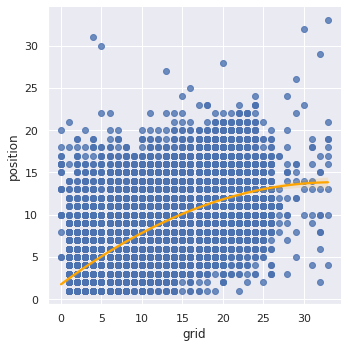

In [ ]:
#représentation graphique sous forme de courbe (degré 2) de la relation entre nos deux colonnes
sns.lmplot(x= "grid" , y= "position", data = results_without_0, order=2,line_kws ={'color':'orange'})

La relation est confirmée, construisons à présent le modèle

Complet set size:  (14458, 16)
Training and Testing set sizes:  (9686, 1) (4772, 1)
Coefficient 0.4556979325426567
beta 2.8112325074899864
Regression performance:
MSE 13.579863134197414
R^2 0.4183747694487363


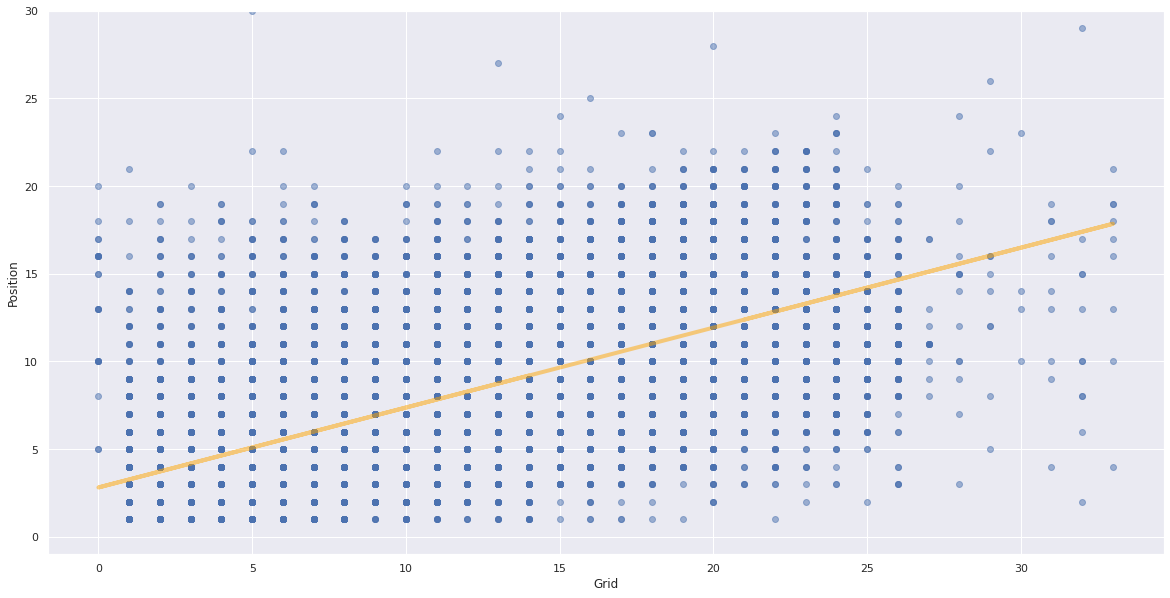

In [ ]:
#Initialisation du modèle
linearMod= linear_model.LinearRegression()

# Initialisation des valeurs x et y qui seront respectivement [['grid']] et ['position']. Ici position = f(grid)
x = results_without_0[['grid']] #Feature metrics
y = results_without_0['position'] #Target vector

#Séparation de notre dataset en "training set" et "testing set"
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, shuffle= True, random_state = 1)
print('Complet set size: ', results_without_0.shape)
print("Training and Testing set sizes: ", x_train.shape, x_test.shape)

#Entrainement de notre modèle et attributs qui permettent de tracer la droite de régression
linearMod.fit(x_train.values, y_train.values)
print('Coefficient', linearMod.coef_[0])
print('beta', linearMod.intercept_)

#Test du modèle
y_pred= linearMod.predict(x_test.values)

#Comparer les réponses de y_pred et y_test. 2 manières de faire: MSE et R^2
print("Regression performance:")
print("MSE", mean_squared_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))

#Faire un plot avec la régression linéaire sous forme de droite
plt.figure(figsize=(20,10))
plt.plot(x,y,'o',alpha=0.5)
plt.plot(x_test, y_pred, 'r', alpha = 0.5, color = 'orange', linewidth=4)
plt.xlabel('Grid')
plt.ylabel('Position')
plt.ylim(-1, 30)
plt.show()

**Sur notre graphique, nous voyons notre régression linéaire décrivant le comportement de "position" en fonction de "grid". La relation est positive, c'est à dire que quand la place sur la grille augmente, la position aussi. De plus, les valeurs des mesures de précision comme R^2 nous informent que notre modèle est relativement précis et peut donc être utilisé pour prédire la position finale pour une valeur de grid. En effet, 41% des variations observées dans le modèle calculé peuvent être expliquées par les points de notre dataset.**

**2) Fonctions**

In [ ]:
#cette fonction renvoie le nombre de point gagnés en fonction d'une position finale
def calculate_points(position):
  if position == 1:
    return 25
  elif position == 2:
    return 18
  elif position == 3:
    return 15
  elif position == 4:
    return 12
  elif position == 5:
    return 10
  elif position == 6:
    return 8
  elif position == 7:
    return 6
  elif position == 8:
    return 4
  elif position == 9:
    return 2
  elif position == 10:
    return 1
  else:
    return 0

In [ ]:
#cette fonction renvoie une liste de points finaux pour une certain moyenne et écart-type de position sur la grille, un nombre de rounds (courses) par saison et un nombre de saisons
def simulate_seasons(muGrid, sigmaGrid, nRounds, nSeasons):
  a, b = 0, 30
  dist = stats.truncnorm((a - muGrid) / sigmaGrid, (b - muGrid) / sigmaGrid, loc=muGrid, scale=sigmaGrid)

  seasons=[]
  i=0
  while (i < nSeasons):
    grid_array = dist.rvs(nRounds)
    grid_int = grid_array.astype(int)

    positions_list = []
    for grid in grid_int:
      x = [[grid]]
      y_pred = linearMod.predict(x)
      positions_list.append(y_pred[0])

    position_array = np.array(positions_list)
    position_int = position_array.astype(int)

    total_points = 0
    for position in position_int:
      total_points += calculate_points(position)
    seasons.append(total_points)
    i+=1
  return seasons

In [ ]:
#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
#cette fonction renvoie la moyenne, une borne supérieure et inférieure d'une liste de valeurs en supposant qu'elle provient d'une distribution normale.
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

**3) Moyenne et écart-type de la place sur la grille de Charles Leclerc sur toute sa carrière**

In [ ]:
mu_grid = LEC_races['grid'].mean()
sigma_grid = np.std(LEC_races['grid'])
print(mu_grid, sigma_grid)

7.888888888888889 4.982066604765636


**4) Simulation pour données "passé"**

In [ ]:
#simulation de 1000 saisons composées de 20 rounds chacune sur base de la moyenne et de la écart-type calculées précédemment (données passées)
seasons_list_1 = simulate_seasons(mu_grid, sigma_grid, 20, 1000)

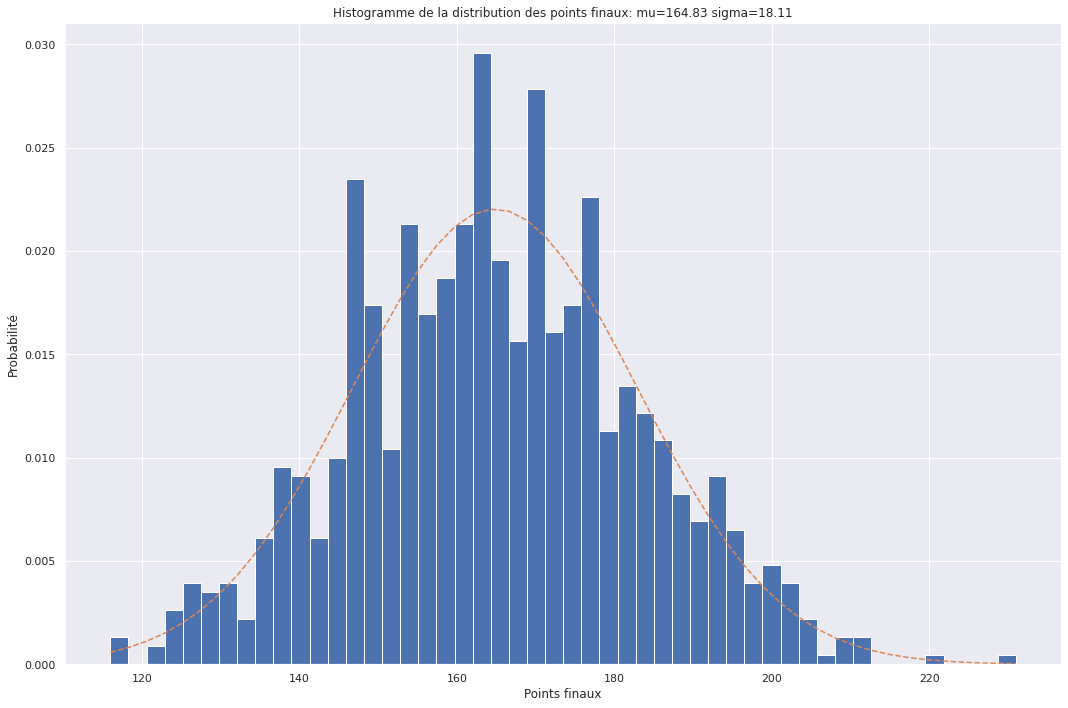

In [ ]:
#https://www.tutorialspoint.com/drawing-average-line-in-histogram-in-matplotlib
#https://www.geeksforgeeks.org/python-standard-deviation-of-list/
#https://www.geeksforgeeks.org/find-average-list-python/

fig, ax = plt.subplots()

mu = statistics.mean(seasons_list_1)
sigma = statistics.pstdev(seasons_list_1)

#Histogramme des données
n, bins, patches = ax.hist(seasons_list_1, 50, density=True)

# Ajout d'une "line of best fit"
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Points finaux')
ax.set_ylabel('Probabilité')
ax.set_title(r'Histogramme de la distribution des points finaux: mu=' + "{:.2f}".format(mu) + ' sigma=' + "{:.2f}".format(sigma))

fig.tight_layout()
plt.show()

In [ ]:
print("En gardant des performances en terme de qualifications égale à son niveau moyen de ses 4 années de carrière, Leclerc peut s'attendre, avec un risque alpha de 5%, de terminer les saisons suivantes avec entre " + str(mean_confidence_interval(seasons_list_1, confidence=0.95)) + " points")

En gardant des performances en terme de qualifications égale à son niveau moyen de ses 4 années de carrière, Leclerc peut s'attendre, avec un risque alpha de 5%, de terminer les saisons suivantes avec entre (163.70869072175987, 165.95730927824013) points


En gardant des performances en terme de qualifications égale à son niveau moyen de ses 4 années de carrière, Leclerc peut s'attendre, avec un risque alpha de 5%, de terminer les saisons suivantes avec entre 164 et 166 points

**5) Scénario positif**

In [ ]:
seasons_list_2 = simulate_seasons(mu_grid*(0.75), sigma_grid*(0.875), 20, 1000)

In [ ]:
print("Si Leclerc augmente de 25% ses performances en qualifications et diminue de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre " + str(mean_confidence_interval(seasons_list_2, confidence=0.95)) + " points en fin de saison.")

Si Leclerc augmente de 25% ses performances en qualifications et diminue de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre (196.54889896068443, 198.5391010393156) points en fin de saison.


Si Leclerc augmente de 25% ses performances en qualifications et diminue de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre 195 et 197 points en fin de saison.

**5) Scénario négatif**

In [ ]:
seasons_list_3 = simulate_seasons(mu_grid*(1.25), sigma_grid*(1.125), 20, 1000)

In [ ]:
print("Si Leclerc augmente de 25% ses performances en qualifications et diminue de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre " + str(mean_confidence_interval(seasons_list_3, confidence=0.95)) + " points en fin de saison.")

Si Leclerc augmente de 25% ses performances en qualifications et diminue de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre (131.6330549550014, 134.0949450449986) points en fin de saison.


Par contre, si Leclerc diminue de 25% ses performances en qualifications et augmente de 12,5% sa variabilité de résultats, il pourra s'attendre à gagner entre 133 et 136 points en fin de saison.

# **7.Summary**

Notre objectif initial était de pouvoir conseiller Charles Leclerc, Pilote pour la Scuderia Ferrari en comparant ses perfomances et celles de son écurie avec un concurrent majeur, à savoir: le pilote Max Verstappen ainsi que l'écurie RedBull pour laquelle il roule.

En analysant tout d'abord les données pour Ferrari et RedBull, nous avons remarqué qu'un des principaux atout de Ferrari était son expérience. En effet, celle-ci participe au championnat de Formule 1 depuis 1950, ce qui est beaucoup comparé à RedBull qui ne court que depuis 2005. Ferrari ayant gagné plusieurs fois des titres mondiaux en Formule 1 notamment avec Michael Schumacher, a réalisé une très belle saison en 2019 avec ses pilote Charles Leclerc et Sebastien Vettel. Pourtant depuis 2020, Ferrari connait une grande chute au niveau de ses points avec un ratio de 7 points par course alors que l'année précédente le ratio était de 24 points par course, la saison 2021 étant toujours en cours, Ferrari dispose d'un ratio de 13 points. Ces observations nous indiquent que Ferrari est devenu beaucoup plus instable que l'un de ses concurrents, RedBull,  qui  a gardé une grande stabilité au niveau de ses points avec 19 points par course en moyenne en 2019, 18 points en 2020 et jusqu'en septembre 2021, 25 points.

Sur base de ces données, nous nous sommes dès lors concentrés sur Charles Leclerc qui a du potentiel pour devenir un futur champion. Afin d'augmenter la pertinence de notre analyse, il était nécessaire de la comparer avec les données d'un autre pilote, Max Verstappen.
Il était intéressant de prendre deux pilotes du même âge pour voir les points communs et divergents dans leurs parcours. Nous avons très vite constaté que Max Verstappen avait commencé en 2015 la Formule 1, ce qui est bien plus tôt que Charles Leclerc, qui lui est arrivé en 2018. Cette différence d'expérience pouvait selon nous être un élément expliquant pourquoi Max Verstappen était plus fort que Charles Leclerc.
Afin d'en avoir le coeur net, nous avons décidé de comparé la croissance par saison des deux pilotes. Force est de constater que Leclerc après son début en F1 en 2018 avec 39 points au total, comptabilisait 260 points en fin de saison 2019. Cette croissance sur un an semblait très prometteuse et laissait entre-voir en lui une possiblité de devenir champion du monde dans les années à venir. En effet, lors de ses débuts Verstappen avait réalisé un score de 49 points en 2015 et 204 points en 2016, ce qui était moins fulgurant comparé à Leclerc.

Malheureusement, en prenant en compte la crise du Covid-19 qui a contraint les organisateurs à annuler plusieurs Grand-Prix, Leclerc a fait une très mauvaise saison avec seulement 100 points au compteur à la fin de la saison 2020, ce qui représente une moyenne de 5 points par course. En comparant ces données avec celles de Verstappen, nous avons pu conclure que Leclerc était beaucoup moins consistent que Verstappen au niveau des points par saison et par course. En y regardant de plus près on a pu constater que depuis 2018, Leclerc n'avait terminé qu'une seule fois premier et 4 fois deuxième. A contrario, verstappen à fini 14 fois vaincqueur et 15 fois deuxième depuis 2018.

Nous nous sommes dès lors vite demandé quel était le véritable problème de Leclerc? Est-ce ses qualifications qui ne sont pas suffisantes? Est-ce certains circuits qui ne lui sont pas favorables? Ou est-ce tout simplement dû à des accidents ou collisions?

En analysant ses prestations durant les qualifications, nous avons directement observé que ses qualifications pouvaient être très bonnes, 9 fois premier, une fois deuxième et 11 fois quatrième; comme très mauvaises, en termiannt de nombreuses fois dixième, onzième, douzième,..., seizième. Nous avons vite comparé ces données avec ses résultats en course. En commençant 9 fois premier, il n'a terminé que 2 fois à cette position. A contrario, Verstappen a signé 10 fois la pôle position aux qualifications et a également terminé 11 fois deuxième et 17 fois troisième. Nous l'avions déjà noté plus haut, mais le principal défaut de Verstappen est son instabilité. Il est capable de faire de bonnes prestations mais est aussi souvent décevant.
En jetant un coup d'oeil aux circuits, nous avons constaté que c'est à Silverstone et au circuit de RedBull Ring qu'il a marqué le plus de points dans sa carrière. Malheureusement, à Monaco, d'où il est originaire, il n'a jamais gagné.

En outre, les pirncipaux dommages que Charles Leclerc a connu sont pour la plupart des accidents ou des collisions avec d'autres pilotes. La fiabilité de la voiture n'entre pas en jeu dans ce cas-ci.


Suite à ces observations et en prenant en compte les différents facteurs influençant les performances de Charles Leclerc, nous avons décidé d'émettre une analyse prédictive de ses résultats futurs. En effet, nous avons remarqué qu'il existait une relation importante entre la position sur la grille et la position en fin de course, c'est pourquoi nous avons décidé de modéliser une régression linéaire.

Pour conseiller au mieux Charles Leclerc, nous constatons qu'il a un rôle énorme à jouer dans sa stabilitié durant les qualifications mais aussi en course. En effet, s'il continue dans sa lancée en alternant résultats convenables et déceptions, il peut espérer continuer sa carrière avec plus ou moins 165 points par an, ce qui n'est absolument pas envisageable pour viser le titre de champion du monde. D'abord, un scénario optimiste s'offre à lui. En effet, s'il augmente ses performances de 25% aux qualifications en faisant de bons chronos et en diminuant sa variabilité de 12,5% de résultats, il sera dès lors en bonne posture pour atteindre la barre des 200 points par an. Dans le cas inverse, il diminuerait ses performances et pourrait espérer un peu moins de 135 points par an, ce qui n'est pas envisageable s'il souhaite un jour devenir chapion du monde.

Cependant, malgré le scénario optimiste que nous avons émis, ce n'est pas suffisant pour devenir champion du monde. En effet, selon nos données, il devrait augmenter d'au minimum 50 à 60% sa moyenne de position à la grille de départ et en fin de course afin d'obtenir le titre que tous les pilotes s'arrachent. De plus, d'autres données commes les condtions météorologiques et le caractère du pilote sont difficilement quantifiables mais notons toute fois que ces paramètres peuvent avoir de l'influence sur nos résultats.




